In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import scipy.io
import matplotlib.ticker as tick
from statistics import mean
import os
from scipy.signal import savgol_filter
from scipy.signal import lfilter

In [3]:
data = scipy.io.loadmat('laser_gyroscope_data/scale_factor/1v_sagnac_1/1v_sagnac_1_06.mat') #getting channel A
freq = scipy.io.loadmat('laser_gyroscope_data/scale_factor/1v_freq_1/1v_freq_1_17.mat') #getting channel C

In [41]:
# print(data, type(data))
# print(freq)
type(data["freq_A_"])

numpy.ndarray

[-0.10222379 -0.10222379 -0.09777928 ... -0.08444574 -0.09333477
 -0.10222379]
(1000000,)
(1000000, 1)
Average:  nan


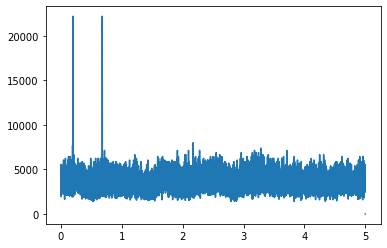

new 3576.4885


In [34]:
# Extracting informtion about time axis from data
tstart = np.array(data['Tstart'])[0][0]
tint = np.array(data['Tinterval'])[0][0]
length = np.array(data['Length'])[0][0]
a = np.array(data['A'])
anew = np.array([a[i][0] for i in range(len(a))])
# print(anew)
freqa = np.array(data['freq_A_'])

# print(tstart, tint, length, a, freqa)
# print(freqa) # data contains nan values 
time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
print(time.shape)
time = time.reshape(1000000, 1) #because the array is of the form (1000000, 1, 1) for some reason
print(time.shape)
avg = np.mean(freqa) #printing the avg does not work because of nan values
print("Average: " , avg)

#plotting 
x = time
y = freqa
plt.plot(x, y)
plt.show()

#removing nan values and determining the avg
freqa = freqa[~np.isnan(freqa)]
# print("new", freqa)
avg = np.mean(freqa)
print ("new", avg)

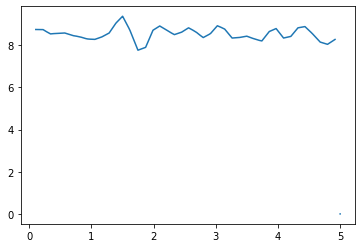

new 8.532506


In [18]:
#same thing the for C channel
tstartf = np.array(freq['Tstart'])
tintf = np.array(freq['Tinterval'])
lengthf = np.array(freq['Length'])
c = np.array(freq['C'])
freqc = np.array(freq['freq_C_'])
# print(freqc)

timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
# print(time)
timef = timef.reshape(1000000, 1)
x = timef
y = freqc
plt.plot(x, y)
plt.show()

freqc = freqc[~np.isnan(freqc)]
# print("new", freqc)
avg = np.mean(freqc)
print ("new", avg)

# Looping over all files for 1v

In [19]:
#First we declare two paths and loop over it
# directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/1v_sagnac_1'
# directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/1v_freq_1'
directory_sagnac = os.path.join(os.getcwd(), "laser_gyroscope_data", "scale_factor", "1v_sagnac_1")
directory_freq = os.path.join(os.getcwd(), "laser_gyroscope_data", "scale_factor", "1v_freq_1")


for filename in os.listdir(directory_sagnac):
    f = os.path.join(directory_sagnac, filename)
    print("Below is the data for" , filename)
    f2 = f.replace('sagnac', 'freq') 
#     print(f2)
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)
#     print(data)

    # Extracting informtion about time axis from data
    tstart = np.array(data['Tstart'])
    tint = np.array(data['Tinterval'])
    length = np.array(data['Length'])
    a = np.array(data['A'])
    freqa = np.array(data['freq_A_'])
#     print(freqa) # data contains nan values 
    time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    time = time.reshape(int(length), 1) #because the array is of the form (1000000, 1, 1) for some reason
    avg = np.mean(freqa) #printing the avg does not work because of nan values
    # print("Average: " , avg)

    # plotting 
    x = time
    y = freqa
    # plt.plot(x, y, ".")
    # plt.show()

    #removing nan values and determining the avg
    freqa = freqa[~np.isnan(freqa)]
#     print("", freqa)
    avg = np.mean(freqa)
    print ("The average frequency for the plot above is given by: ", avg)
    
    #Adding stuff for frequency part
    tstartf = np.array(freq['Tstart'])
    tintf = np.array(freq['Tinterval'])
    lengthf = np.array(freq['Length'])
    c = np.array(freq['C'])
    freqc = np.array(freq['freq_C_'])
#     print(freqc)

    timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    # print(time)
    timef = timef.reshape(int(lengthf), 1)
    x = timef
    y = freqc
    # plt.plot(x, y)
    # plt.show()

    freqc = freqc[~np.isnan(freqc)]
#     print("new", freqc)
    avg = np.mean(freqc)
    print ("The average frequency for the plot above while rotating is :", avg)
    print("\n")

Below is the data for 1v_sagnac_1_01.mat
The average frequency for the plot above is given by:  2268.53
The average frequency for the plot above while rotating is : 8.989638


Below is the data for 1v_sagnac_1_02.mat
The average frequency for the plot above is given by:  3576.4885
The average frequency for the plot above while rotating is : 8.750827


Below is the data for 1v_sagnac_1_03.mat
The average frequency for the plot above is given by:  3616.6401
The average frequency for the plot above while rotating is : 8.75736


Below is the data for 1v_sagnac_1_04.mat
The average frequency for the plot above is given by:  18042.29
The average frequency for the plot above while rotating is : 8.798331


Below is the data for 1v_sagnac_1_05.mat
The average frequency for the plot above is given by:  24507.191
The average frequency for the plot above while rotating is : 8.758118


Below is the data for 1v_sagnac_1_06.mat
The average frequency for the plot above is given by:  4061.4814
The aver

## Below is Keito's code that include the fix to the problem we were facing

0 4.999999873689376e-06 1000000
(1000000,)
4.999999873689376 4.999999873689376e-06 1000000
(1000000,)
9.999999747378752 4.999999873689376e-06 1000000
(1000000,)


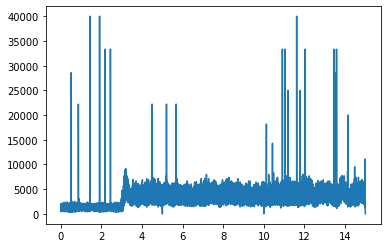

In [51]:
# importing the path
# directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/1v_sagnac_1'
# directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/1v_freq_1'

directory_sagnac = os.path.join(os.getcwd(), "laser_gyroscope_data", "scale_factor", "1v_sagnac_1")
directory_freq = os.path.join(os.getcwd(), "laser_gyroscope_data", "scale_factor", "1v_freq_1")

# declaring arrays which will combine all the data
# all_tstart = np.array([])
# all_tint = np.array([])
# all_length = np.array([])
# all_a = np.array([])
# all_freqa = np.array([])
# all_time = np.array([])

# all_tstartf = np.array([])
# all_tintf = np.array([])
# all_lengthf = np.array([])
# all_c = np.array([])
# all_freqc = np.array([])
# all_timef = np.array([])

i=0

all_timea_list = []
all_freqa_list = []
all_freqc_list = []

tstart = 0

# loop for combining the data
for filename in os.listdir(directory_sagnac)[:3]:
    f = os.path.join(directory_sagnac, filename)
    f2 = f.replace('sagnac', 'freq')
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)

    
    # tstart += data["Tstart"][0][0]

    tint = data["Tinterval"][0][0]
    length = data["Length"][0][0]

    print(tstart, tint, length)

    

    # same with frequency
    freqa = np.array(data["freq_A_"])[:,0]
    print(freqa.shape)
    freqa_nonan = freqa[~np.isnan(freqa)]
    all_freqa_list.append(freqa_nonan)

    time = np.linspace(tstart, tstart + tint * length, length)
    time = time[~np.isnan(freqa)]
    all_timea_list.append(time)

    # update tstart
    tstart += tint * length

    # do this for the rotation frequency too

    # tstart = data["Tstart"][0][0]
    # tint = data["Tinterval"][0][0]
    # length = data["Length"][0][0]


    # freqc = freq["freq_C_"]
    # freqc = freqc[~np.isnan(freqc)]
    # all_freqc_list.append(freqc)

    
    # # for the channel A, the sagnac frequency 
    # tstart = np.array(data['Tstart'])
    # all_tstart = np.append(all_tstart, tstart)
    
    # tint = np.array(data['Tinterval'])
    # all_tint = np.append(all_tint, tint)
    
    # length = np.array(data['Length'])
    # all_length = np.append(all_length, length)
    
    # a = np.array(data['A'])
    # all_a = np.append(all_a, a)
    
    # freqa = np.array(data['freq_A_'])
    # all_freqa = np.append(all_freqa, freqa)
    
    # time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    # time = time.reshape(int(length), 1)
    # all_time = np.append(all_time, time)
    
    # #for the channel C, the rotating table
    # tstartf = np.array(freq['Tstart'])
    # all_tstartf = np.append(all_tstartf, tstartf)
    
    # tintf = np.array(freq['Tinterval'])
    # all_tintf = np.append(all_tintf, tintf)
    
    # lengthf = np.array(freq['Length'])
    # all_lengthf = np.append(all_lengthf, lengthf)
    
    # c = np.array(freq['C'])
    # all_c = np.append(all_c, c)
    
    # freqc = np.array(freq['freq_C_'])
    # print(all_freqc.shape)
    # all_freqc = np.append(all_freqc, freqc)
    
    # tstart = i
    # timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    # i = i + int(length)
    # timef = timef.reshape(int(lengthf), 1)
    # all_timef = np.append(all_timef, time)

# #plotting sagnac frequency 
# x = all_time[all_freqa<10000]
# y = all_freqa[all_freqa<10000]

# #filtering out the noise 
# w = savgol_filter(y, 101, 2)

# # plt.figure(figsize=(105, 8))
# plt.figure(figsize=(8,4))
# # plt.plot(x, w, ".")
# plt.plot(x, w, lw=1.0)
# plt.title("Sagnac frequency")
# plt.show()

# # plt.savefig("/Users/tesla/Downloads/not_filtered.png")

# # calculating the average of filtered data
# w = w[~np.isnan(w)]
# avg = np.mean(w)
# print ("The average frequency for the plot above is given by: ", avg)

# #plotting rotating table frequency 
# xc = all_timef
# yc = all_freqc

# # plt.figure(figsize=(105, 8))
# plt.figure(figsize=(8,4))
# plt.plot(xc, yc, ".")
# plt.title("Table rotation")
# plt.show()

# freqc = freqc[~np.isnan(freqc)]
# avg = np.mean(freqc)
# print ("The average frequency for the plot above while rotating is :", avg)

# concatenate the time and frequency arrrays
alltime_a = np.concatenate(tuple(all_timea_list))
allfreq_a = np.concatenate(tuple(all_freqa_list))

plt.plot(alltime_a, allfreq_a)

# Writing the new, final code

1v_sagnac_1
1v_freq_1


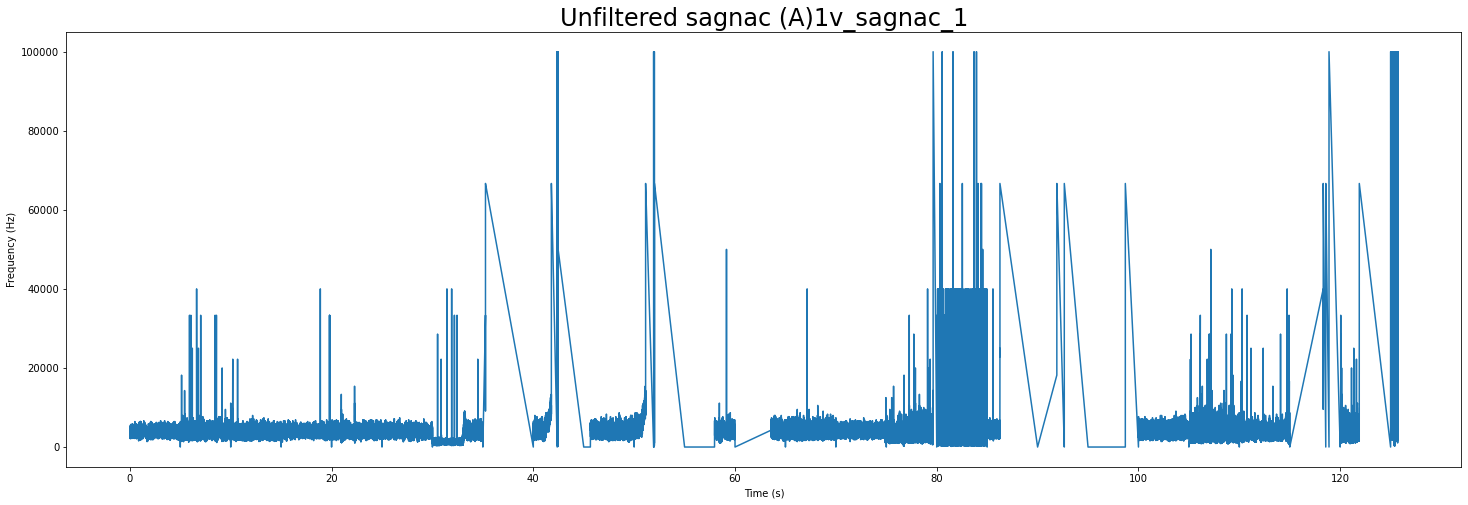

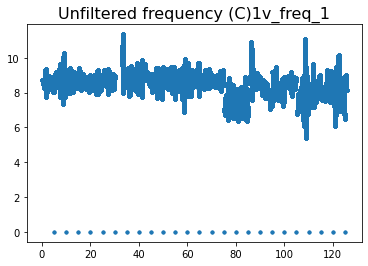

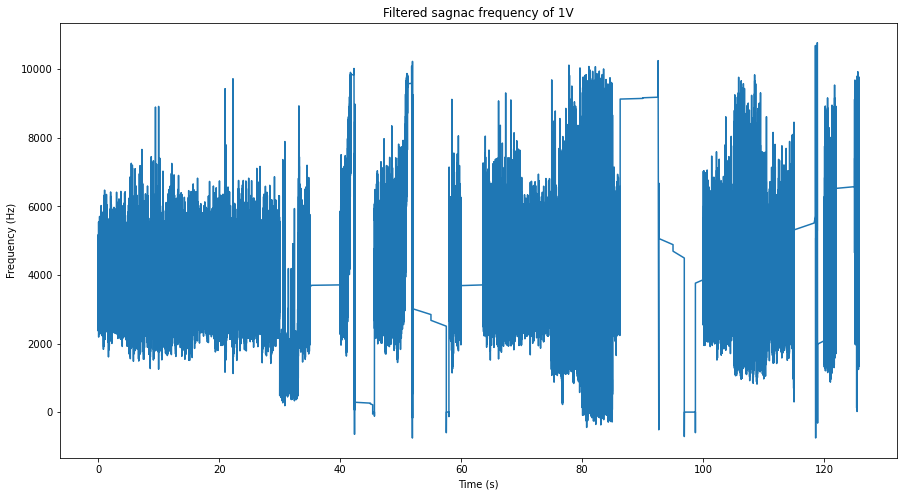

The average sagnac frequency for 1V:  3517.5789


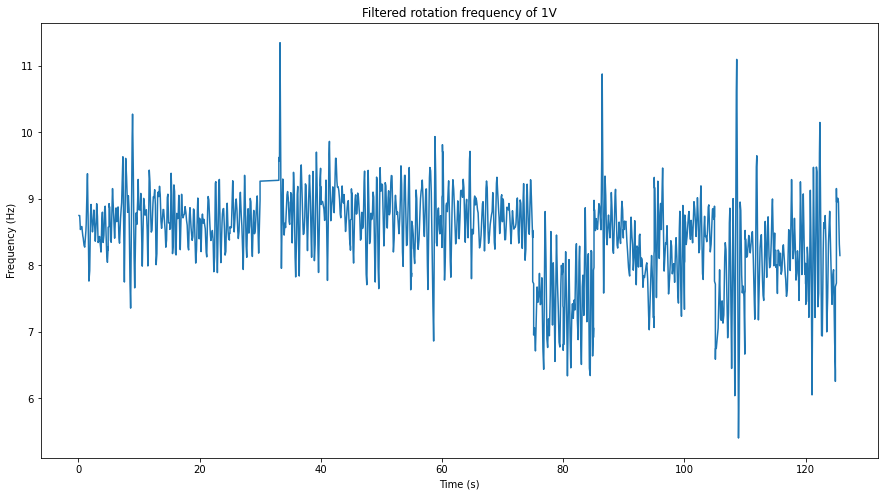

The average rotation frequency for 1V:  8.448011
1.5v_sagnac_1
1.5v_freq_1


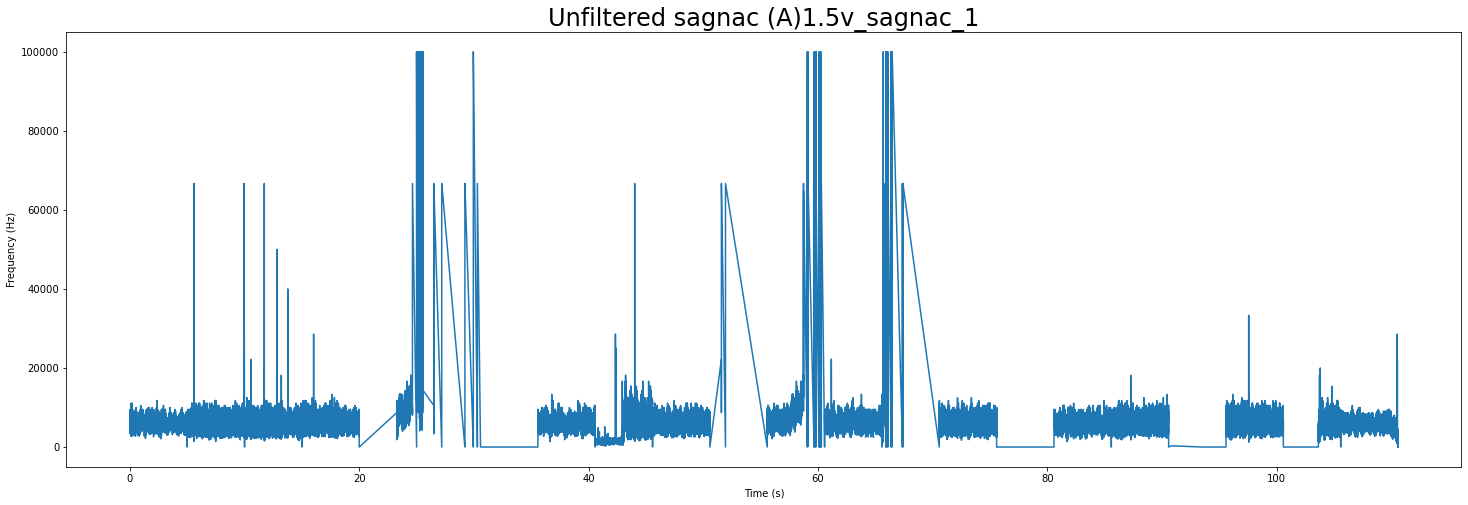

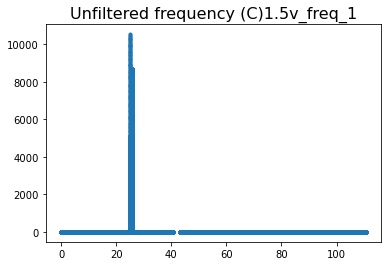

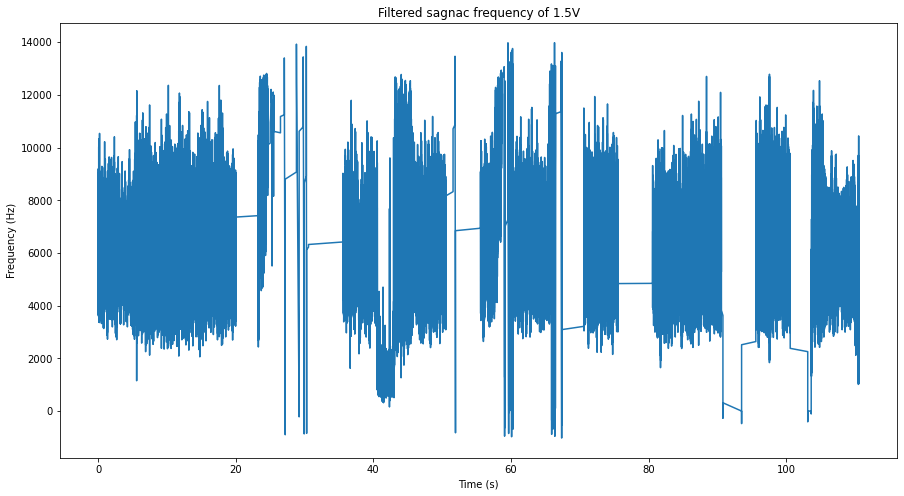

The average sagnac frequency for 1.5V:  5681.107


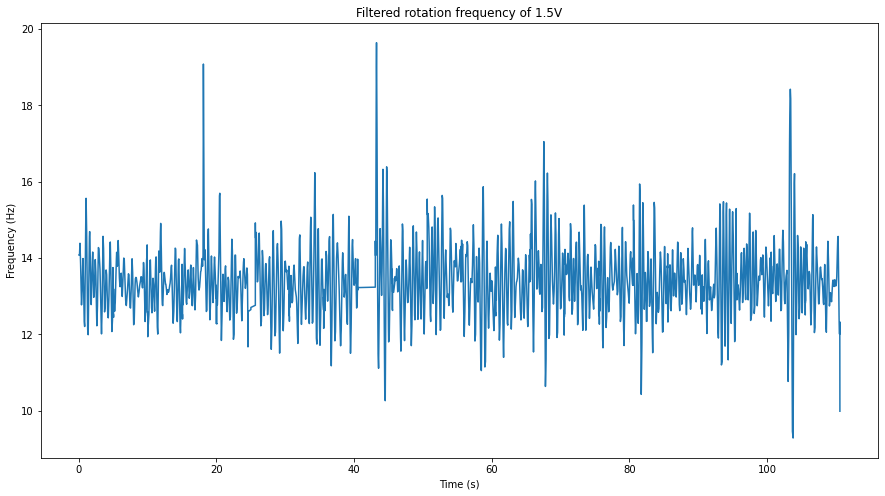

The average rotation frequency for 1.5V:  13.41675
2v_sagnac_1
2v_freq_1


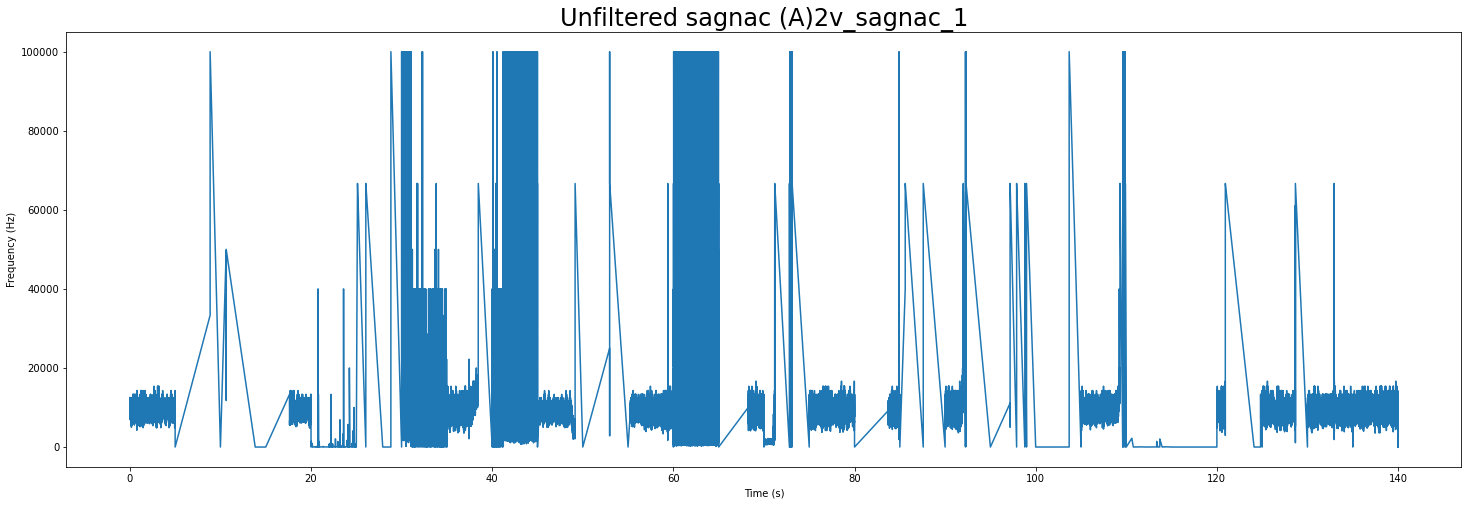

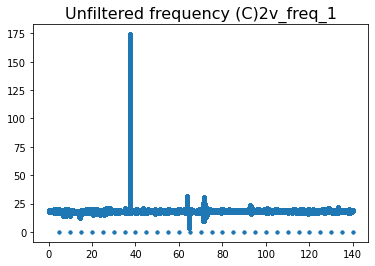

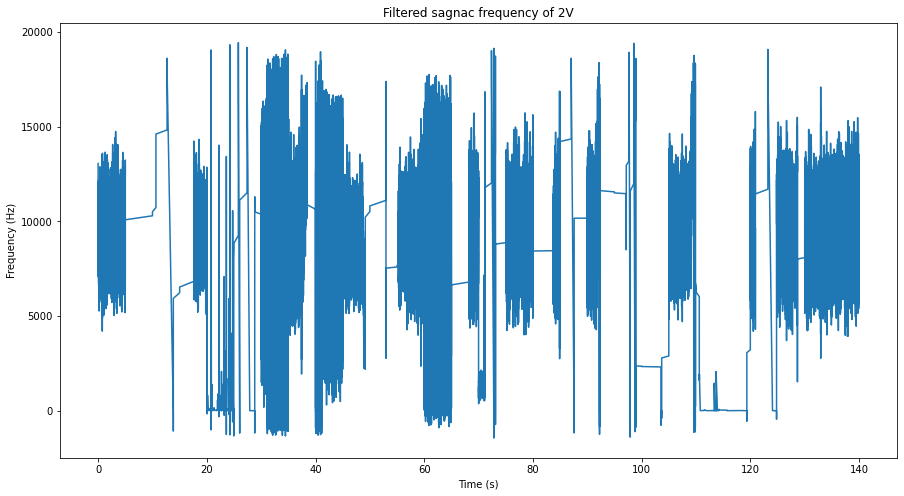

The average sagnac frequency for 2V:  6781.946


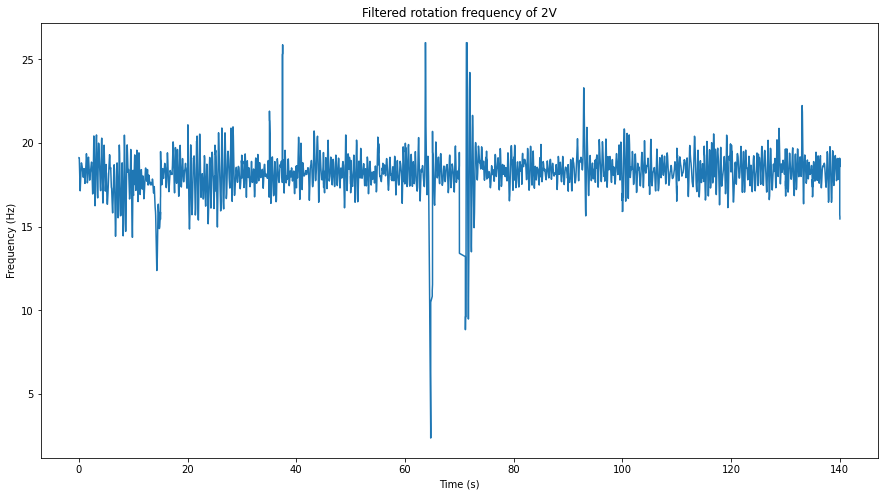

The average rotation frequency for 2V:  18.23523
2.5v_sagnac_1
2.5v_freq_1


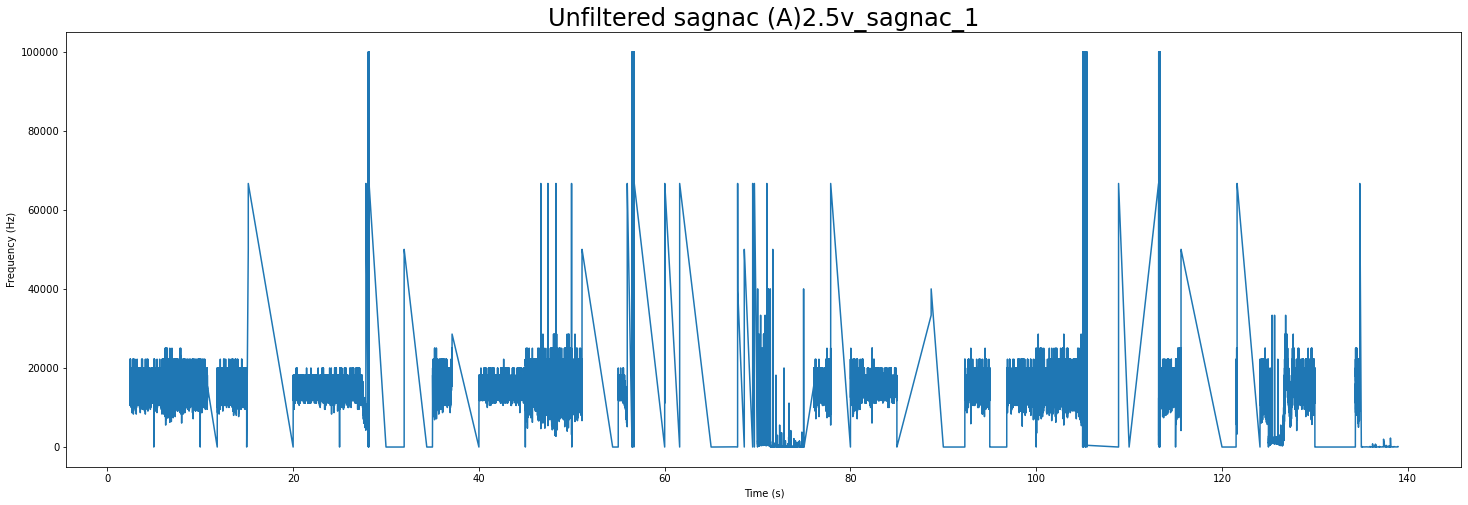

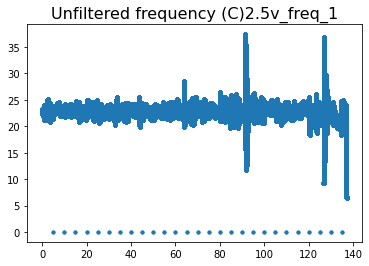

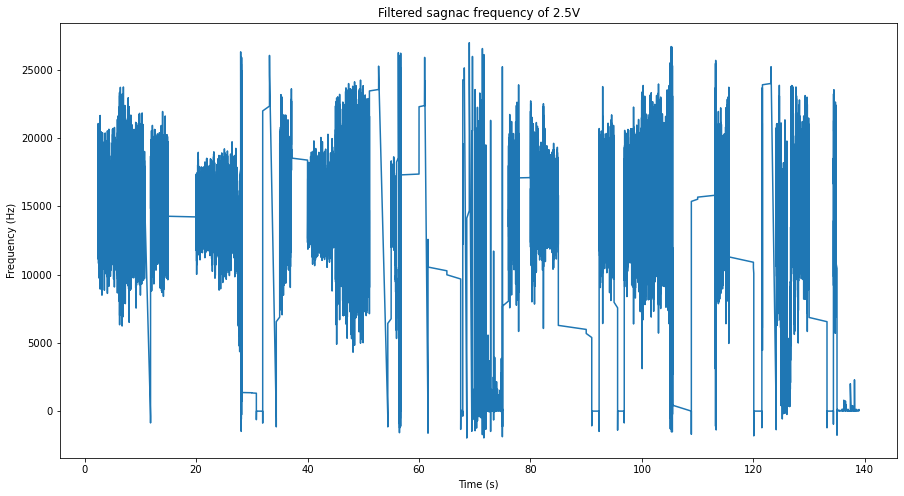

The average sagnac frequency for 2.5V:  11281.679


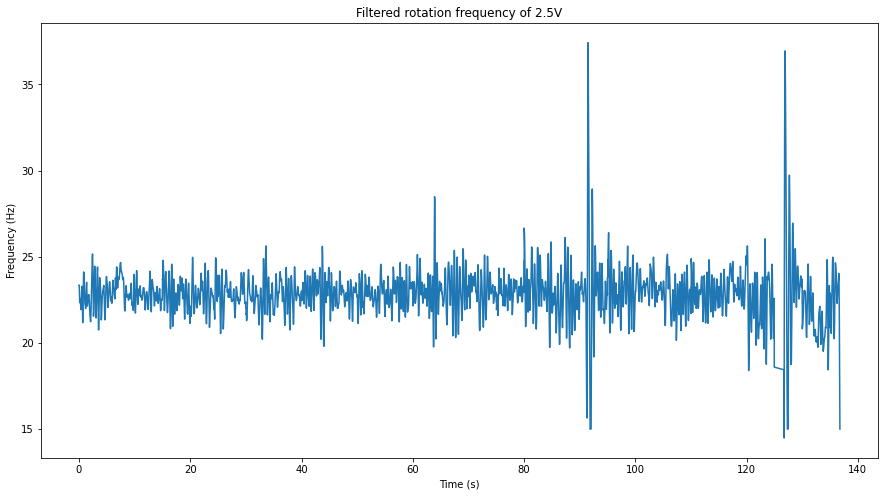

The average rotation frequency for 2.5V:  22.869892
3v_sagnac_2
3v_freq_1


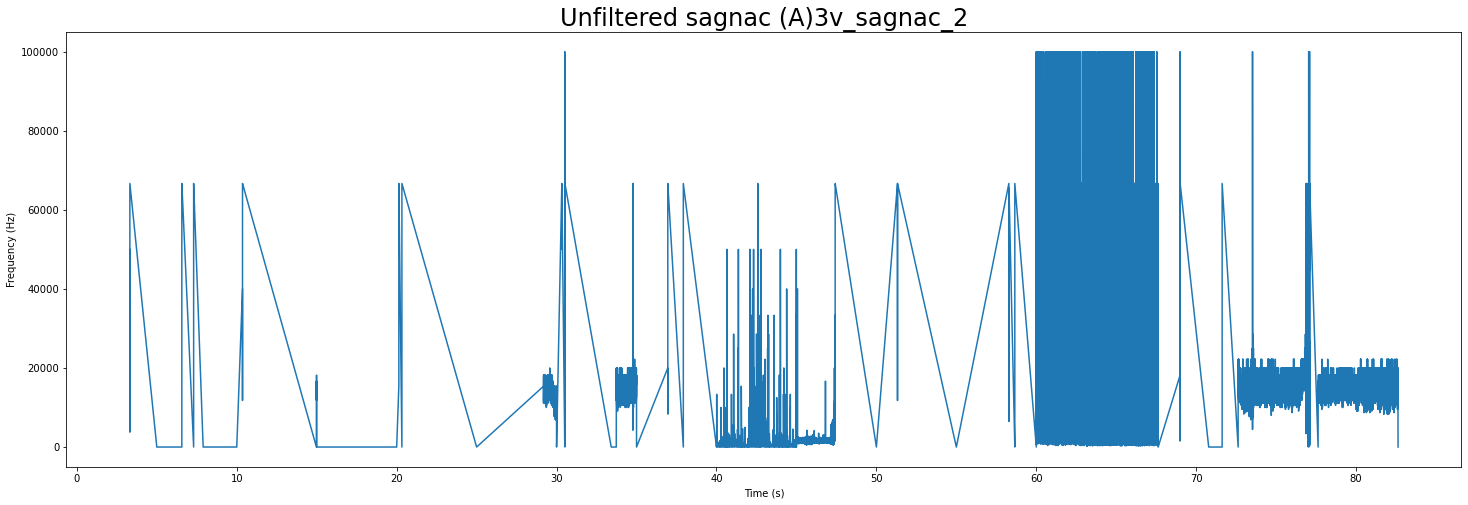

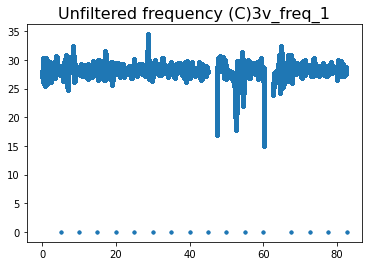

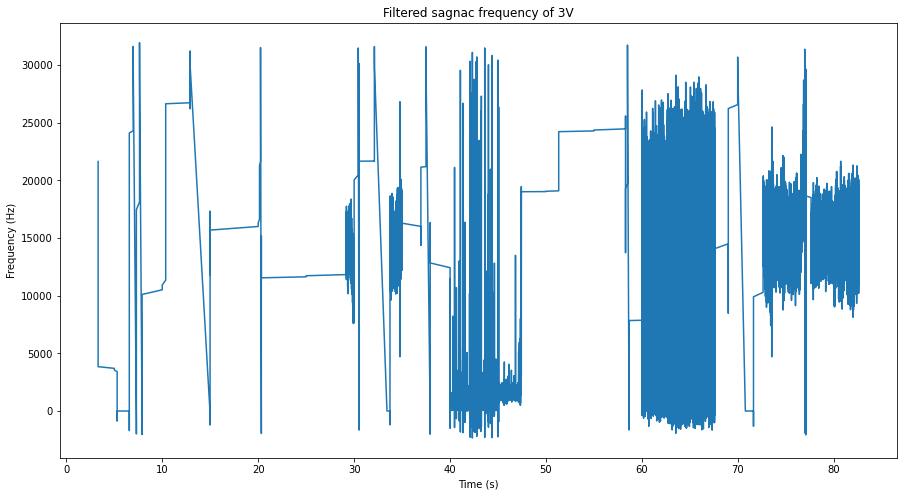

The average sagnac frequency for 3V:  8998.486


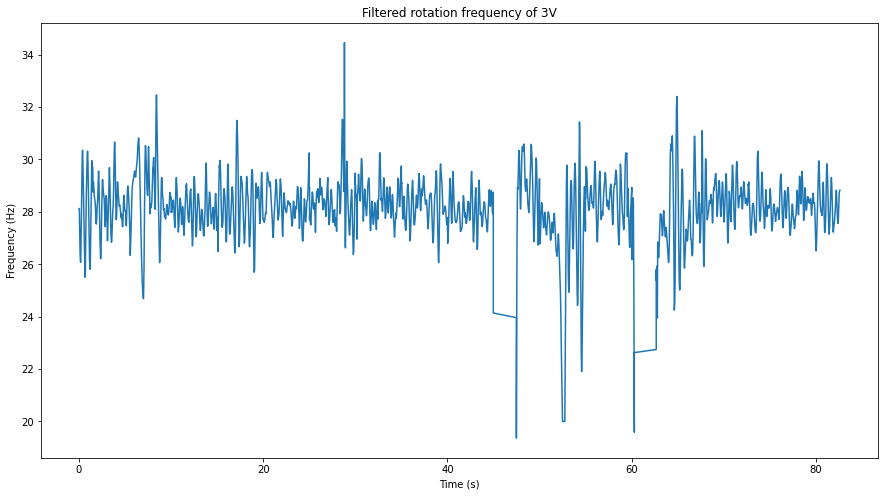

The average rotation frequency for 3V:  28.203918
5v_sagnac_1
5v_freq_1


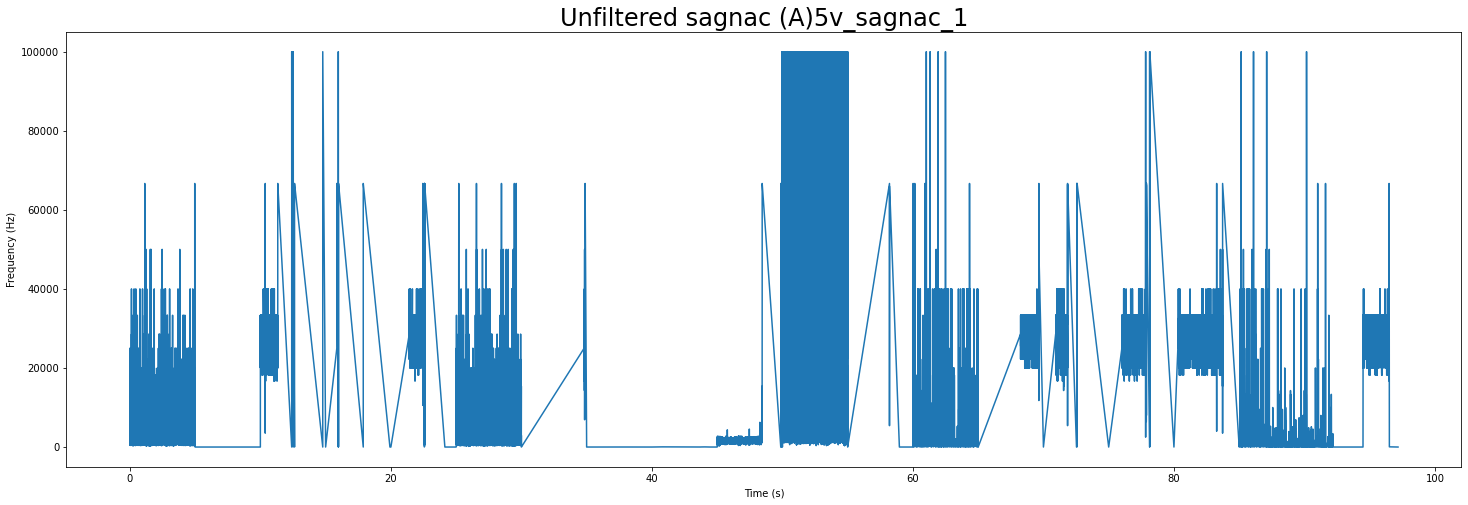

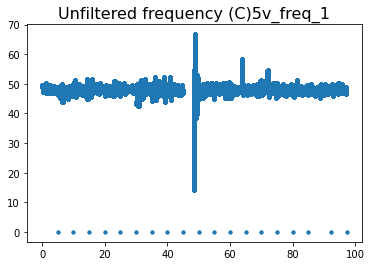

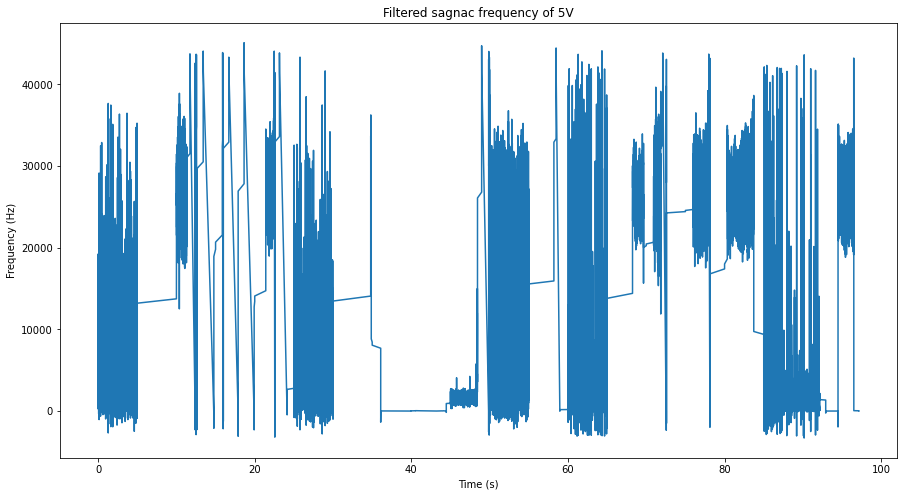

The average sagnac frequency for 5V:  9665.531


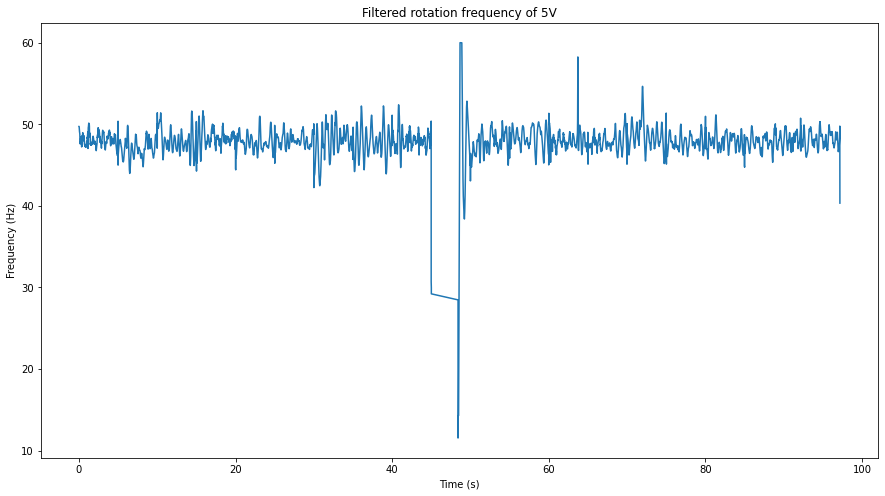

The average rotation frequency for 5V:  47.89182
The avg sagnac values are [9665.531]
The avg freq values are [47.89182]


In [55]:
# declaring all folders to loop over
folder = ["1v_sagnac_1", "1.5v_sagnac_1", "2v_sagnac_1", "2.5v_sagnac_1", "3v_sagnac_2", "5v_sagnac_1"]

for name in folder:
    print (name)
    directory_sagnac = os.path.join(os.getcwd(), "laser_gyroscope_data", "scale_factor", name)
    if name == "3v_sagnac_2":
        namef = name.replace('sagnac_2', 'freq_1')
        directory_freq = os.path.join(os.getcwd(), "laser_gyroscope_data", "scale_factor", namef)
    else:
        namef = name.replace('sagnac', 'freq')
        directory_freq = os.path.join(os.getcwd(), "laser_gyroscope_data", "scale_factor", namef)
    print(namef)
    
    i=0

    all_timea_list = []
    all_timec_list = []
    all_freqa_list = []
    all_freqc_list = []

    tstart = 0
    tstartc = 0
    
    avg_sagnac = []
    avg_freq = []

    # loop for combining the data
    for filename in os.listdir(directory_sagnac):
        f = os.path.join(directory_sagnac, filename)
        if directory_sagnac == os.path.join(os.getcwd(), "laser_gyroscope_data", "scale_factor", "3v_sagnac_2"):
            f2 = f.replace('sagnac_2', 'freq_1')
        else: 
            f2 = f.replace('sagnac', 'freq')
        
        data = scipy.io.loadmat(f)
        freq = scipy.io.loadmat(f2)


#         tstart += data["Tstart"][0][0]

        # channel A
        tint = data["Tinterval"][0][0]
        length = data["Length"][0][0]

#         print(tstart, tint, length)

        freqa = np.array(data["freq_A_"])[:,0]
        freqa_nonan = freqa[~np.isnan(freqa)]
        all_freqa_list.append(freqa_nonan)

        time = np.linspace(tstart, tstart + tint * length, length)
        time = time[~np.isnan(freqa)]
        all_timea_list.append(time)

        # update tstart
        tstart += tint * length
        
        # channel C
        tintc = freq["Tinterval"][0][0]
        lengthc = freq["Length"][0][0]
        
        freqc = np.array(freq["freq_C_"])[:,0]
        freqc_nonan = freqc[~np.isnan(freqc)]
        all_freqc_list.append(freqc_nonan)
        
        timec = np.linspace(tstartc, tstartc + tintc * lengthc, lengthc)
        timec = timec[~np.isnan(freqc)]
        all_timec_list.append(timec)
        
        tstartc += tintc * lengthc
        
    alltime_a = np.concatenate(tuple(all_timea_list))
    allfreq_a = np.concatenate(tuple(all_freqa_list))
    
    alltime_c = np.concatenate(tuple(all_timec_list))
    allfreq_c = np.concatenate(tuple(all_freqc_list))

    # plotting channel A (unfiltered)
    plt.figure(figsize=(25, 8))
    plt.plot(alltime_a, allfreq_a)
    plt.title("Unfiltered sagnac (A)" + name, fontsize = 24)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.show()
    
    # plotting channel C (unfiltered)
    plt.plot(alltime_c, allfreq_c, ".")
    plt.title("Unfiltered frequency (C)" + namef, fontsize = 16)
    plt.show()
    
    # filtering and taking average for 1V
    if name == "1v_sagnac_1":
        # setting loose upper limit 
        x = alltime_a[allfreq_a<10000]
        y = allfreq_a[allfreq_a<10000]
        
        #filtering data 
        w = savgol_filter(y, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(x, w)
        plt.title("Filtered sagnac frequency of 1V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(w)
        avg_sagnac.append(avg)
        print ("The average sagnac frequency for 1V: ", avg)
        
        # channel C
        xc = alltime_c[allfreq_c>4]
        yc = allfreq_c[allfreq_c>4]
        
        #filtering data 
        wc = savgol_filter(yc, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(xc, wc)
        plt.title("Filtered rotation frequency of 1V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(wc)
        avg_freq.append(avg)
        print ("The average rotation frequency for 1V: ", avg)
        
    # filtering for 1.5V
    elif name == "1.5v_sagnac_1":
        # setting loose upper limit 
        x = alltime_a[allfreq_a<13000]
        y = allfreq_a[allfreq_a<13000]
        
        #filtering data 
        w = savgol_filter(y, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(x, w)
        plt.title("Filtered sagnac frequency of 1.5V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(w)
        avg_sagnac.append(avg)
        print ("The average sagnac frequency for 1.5V: ", avg)
        
        # channel C
        xc = alltime_c[allfreq_c>8]
        yc = allfreq_c[allfreq_c>8]
        xc = alltime_c[allfreq_c<22] # also setting an upper value to avoid high values
        yc = allfreq_c[allfreq_c<22]
        
        #filtering data 
        wc = savgol_filter(yc, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(xc, wc)
        plt.title("Filtered rotation frequency of 1.5V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(wc)
        avg_freq.append(avg)
        print ("The average rotation frequency for 1.5V: ", avg)
        
    # filtering for 2v
    elif name == "2v_sagnac_1":
        # setting loose upper limit 
        x = alltime_a[allfreq_a<18000]
        y = allfreq_a[allfreq_a<18000]
        
        #filtering data 
        w = savgol_filter(y, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(x, w)
        plt.title("Filtered sagnac frequency of 2V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(w)
        avg_sagnac.append(avg)
        print ("The average sagnac frequency for 2V: ", avg)
        
        # channel C
        xc = alltime_c[allfreq_c>10]
        yc = allfreq_c[allfreq_c>10]
        xc = alltime_c[allfreq_c<26]
        yc = allfreq_c[allfreq_c<26]
        
        #filtering data 
        wc = savgol_filter(yc, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(xc, wc)
        plt.title("Filtered rotation frequency of 2V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(wc)
        avg_freq.append(avg)
        print ("The average rotation frequency for 2V: ", avg)
        
    # filtering for 2.5v
    elif name == "2.5v_sagnac_1":
        # setting loose upper limit 
        x = alltime_a[allfreq_a<25000]
        y = allfreq_a[allfreq_a<25000]
        
        #filtering data 
        w = savgol_filter(y, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(x, w)
        plt.title("Filtered sagnac frequency of 2.5V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(w)
        avg_sagnac.append(avg)
        print ("The average sagnac frequency for 2.5V: ", avg)
        
        # channel C
        xc = alltime_c[allfreq_c>15]
        yc = allfreq_c[allfreq_c>15]
        
        #filtering data 
        wc = savgol_filter(yc, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(xc, wc)
        plt.title("Filtered rotation frequency of 2.5V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(wc)
        avg_freq.append(avg)
        print ("The average rotation frequency for 2.5V: ", avg)
        
    # filtering for 3v
    elif name == "3v_sagnac_2":
        # setting loose upper limit 
        x = alltime_a[allfreq_a<30000]
        y = allfreq_a[allfreq_a<30000]
        
        #filtering data 
        w = savgol_filter(y, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(x, w)
        plt.title("Filtered sagnac frequency of 3V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(w)
        avg_sagnac.append(avg)
        print ("The average sagnac frequency for 3V: ", avg)
        
        # channel C
        xc = alltime_c[allfreq_c>20]
        yc = allfreq_c[allfreq_c>20]
        
        #filtering data 
        wc = savgol_filter(yc, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(xc, wc)
        plt.title("Filtered rotation frequency of 3V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(wc)
        avg_freq.append(avg)
        print ("The average rotation frequency for 3V: ", avg)
        
    # filtering for 5v
    elif name == "5v_sagnac_1":
        # setting loose upper limit 
        x = alltime_a[allfreq_a<42000]
        y = allfreq_a[allfreq_a<42000]
        
        #filtering data 
        w = savgol_filter(y, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(x, w)
        plt.title("Filtered sagnac frequency of 5V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(w)
        avg_sagnac.append(avg)
        print ("The average sagnac frequency for 5V: ", avg)
        
        # channel C
        xc = alltime_c[allfreq_c>40]
        yc = allfreq_c[allfreq_c>40]
        xc = alltime_c[allfreq_c<60]
        yc = allfreq_c[allfreq_c<60]
        
        #filtering data 
        wc = savgol_filter(yc, 101, 2)
        
        plt.figure(figsize=(15, 8))
        plt.plot(xc, wc)
        plt.title("Filtered rotation frequency of 5V")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.show()
        avg = np.mean(wc)
        avg_freq.append(avg)
        print ("The average rotation frequency for 5V: ", avg)

## Below onwards is Paarth's code

## Trying to concatenate all the numpy arrays

(0,)
(1000000,)


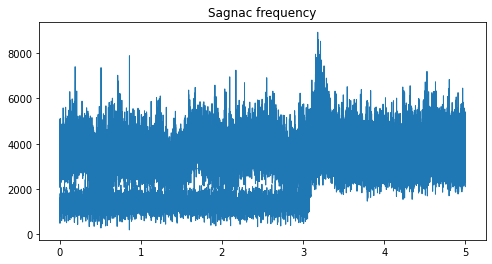

The average frequency for the plot above is given by:  2914.693706230278


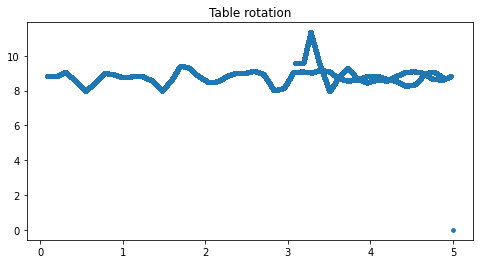

The average frequency for the plot above while rotating is : 8.750827


In [29]:
# importing the path
directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/1v_sagnac_1'
directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/1v_freq_1'

# declaring arrays which will combine all the data
all_tstart = np.array([])
all_tint = np.array([])
all_length = np.array([])
all_a = np.array([])
all_freqa = np.array([])
all_time = np.array([])

all_tstartf = np.array([])
all_tintf = np.array([])
all_lengthf = np.array([])
all_c = np.array([])
all_freqc = np.array([])
all_timef = np.array([])

i=0

# loop for combining the data
for filename in os.listdir(directory_sagnac):
    f = os.path.join(directory_sagnac, filename)
    f2 = f.replace('sagnac', 'freq')
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)
    
    # for the channel A, the sagnac frequency 
    tstart = np.array(data['Tstart'])
    all_tstart = np.append(all_tstart, tstart)
    
    tint = np.array(data['Tinterval'])
    all_tint = np.append(all_tint, tint)
    
    length = np.array(data['Length'])
    all_length = np.append(all_length, length)
    
    a = np.array(data['A'])
    all_a = np.append(all_a, a)
    
    freqa = np.array(data['freq_A_'])
    all_freqa = np.append(all_freqa, freqa)
    
    time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    time = time.reshape(int(length), 1)
    all_time = np.append(all_time, time)
    
    #for the channel C, the rotating table
    tstartf = np.array(freq['Tstart'])
    all_tstartf = np.append(all_tstartf, tstartf)
    
    tintf = np.array(freq['Tinterval'])
    all_tintf = np.append(all_tintf, tintf)
    
    lengthf = np.array(freq['Length'])
    all_lengthf = np.append(all_lengthf, lengthf)
    
    c = np.array(freq['C'])
    all_c = np.append(all_c, c)
    
    freqc = np.array(freq['freq_C_'])
    print(all_freqc.shape)
    all_freqc = np.append(all_freqc, freqc)
    
    tstart = i
    timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    i = i + int(length)
    timef = timef.reshape(int(lengthf), 1)
    all_timef = np.append(all_timef, time)

#plotting sagnac frequency 
x = all_time[all_freqa<10000]
y = all_freqa[all_freqa<10000]

#filtering out the noise 
w = savgol_filter(y, 101, 2)

plt.figure(figsize=(105, 8))
plt.plot(x, w, ".")
plt.show()

# plt.savefig("/Users/tesla/Downloads/not_filtered.png")

# calculating the average of filtered data
w = w[~np.isnan(w)]
avg = np.mean(w)
print ("The average frequency for the plot above is given by: ", avg)

#plotting rotating table frequency 
xc = all_timef
yc = all_freqc

plt.figure(figsize=(105, 8))
plt.plot(xc, yc, ".")
plt.show()

freqc = freqc[~np.isnan(freqc)]
avg = np.mean(freqc)
print ("The average frequency for the plot above while rotating is :", avg)

# Looping over all files for 1.5v

Below is the data for 1.5v_sagnac_1_09.mat


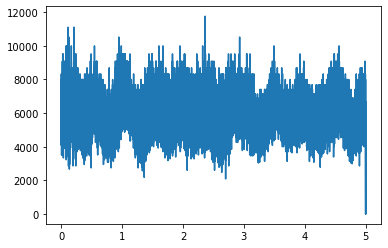

The average frequency for the plot above is given by:  5920.497


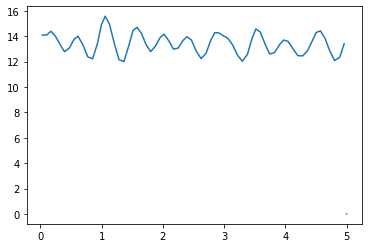

The average frequency for the plot above while rotating is : 13.392579
Below is the data for 1.5v_sagnac_1_21.mat


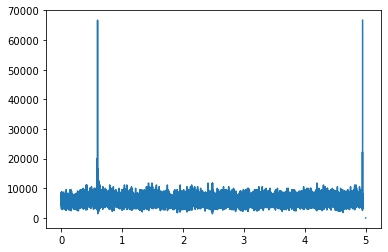

The average frequency for the plot above is given by:  5866.668


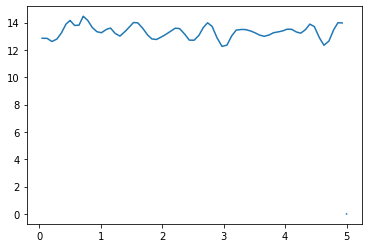

The average frequency for the plot above while rotating is : 13.308539
Below is the data for 1.5v_sagnac_1_20.mat


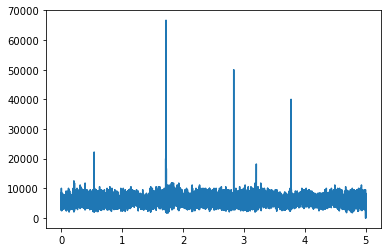

The average frequency for the plot above is given by:  5845.129


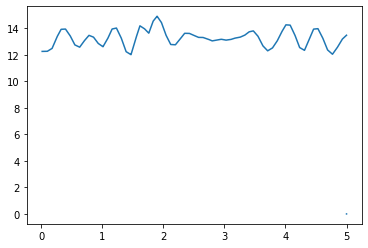

The average frequency for the plot above while rotating is : 13.241872
Below is the data for 1.5v_sagnac_1_08.mat


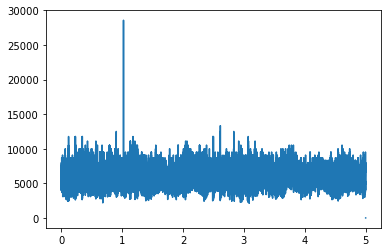

The average frequency for the plot above is given by:  5986.662


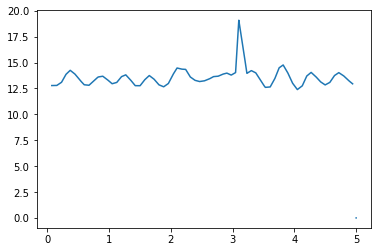

The average frequency for the plot above while rotating is : 13.565646
Below is the data for 1.5v_sagnac_1_22.mat


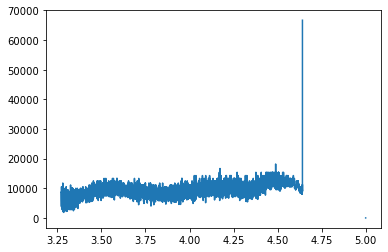

The average frequency for the plot above is given by:  9330.715


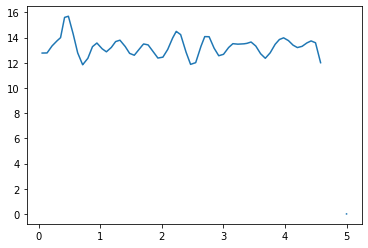

The average frequency for the plot above while rotating is : 13.285642
Below is the data for 1.5v_sagnac_1_23.mat


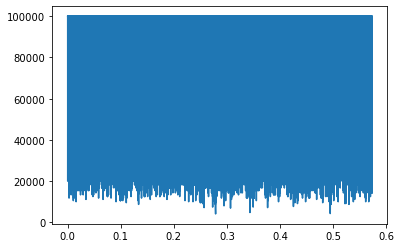

The average frequency for the plot above is given by:  51743.465


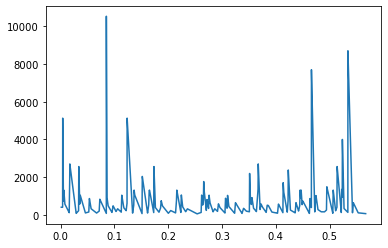

The average frequency for the plot above while rotating is : 643.1525
Below is the data for 1.5v_sagnac_1_18.mat


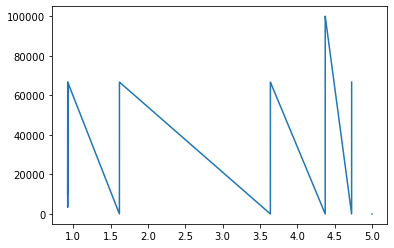

The average frequency for the plot above is given by:  34879.582


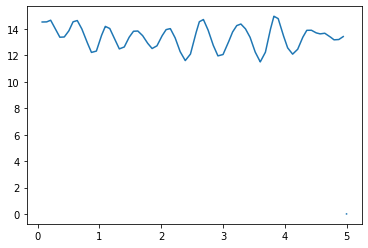

The average frequency for the plot above while rotating is : 13.355537
Below is the data for 1.5v_sagnac_1_19.mat


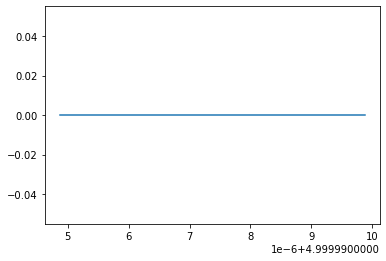

The average frequency for the plot above is given by:  0.0


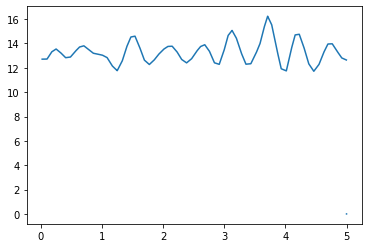

The average frequency for the plot above while rotating is : 13.280364
Below is the data for 1.5v_sagnac_1_14.mat


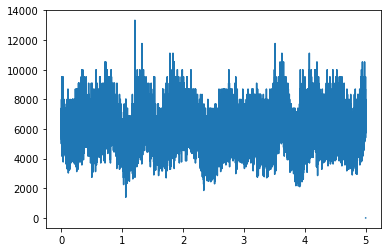

The average frequency for the plot above is given by:  5966.973


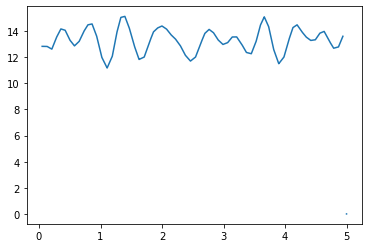

The average frequency for the plot above while rotating is : 13.297366
Below is the data for 1.5v_sagnac_1_01.mat


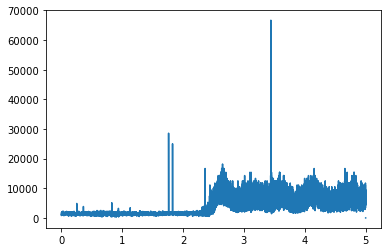

The average frequency for the plot above is given by:  4088.072


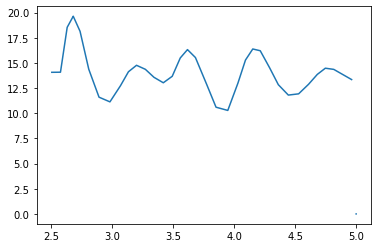

The average frequency for the plot above while rotating is : 13.876728
Below is the data for 1.5v_sagnac_1_15.mat


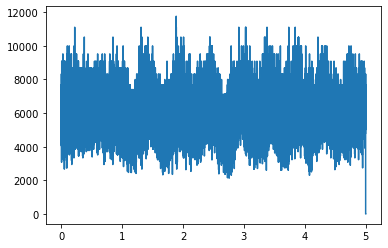

The average frequency for the plot above is given by:  5963.9106


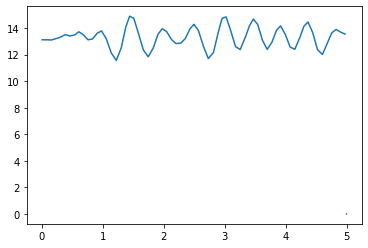

The average frequency for the plot above while rotating is : 13.295495
Below is the data for 1.5v_sagnac_1_03.mat


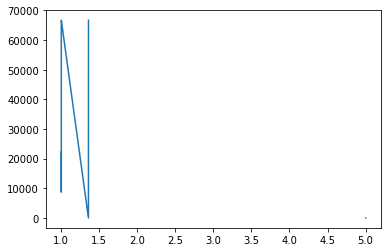

The average frequency for the plot above is given by:  33326.887


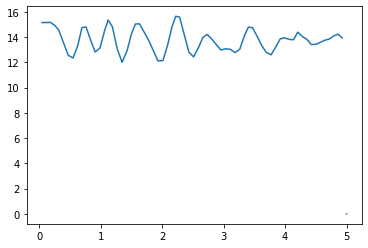

The average frequency for the plot above while rotating is : 13.734812
Below is the data for 1.5v_sagnac_1_17.mat


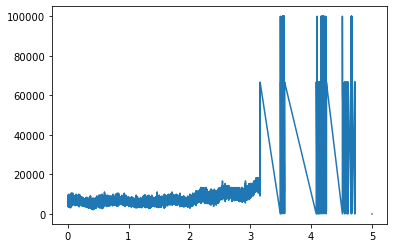

The average frequency for the plot above is given by:  16046.527


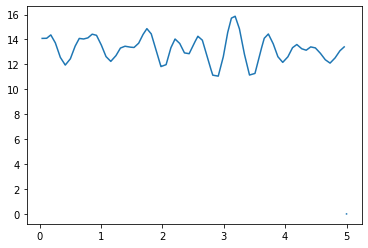

The average frequency for the plot above while rotating is : 13.231573
Below is the data for 1.5v_sagnac_1_16.mat


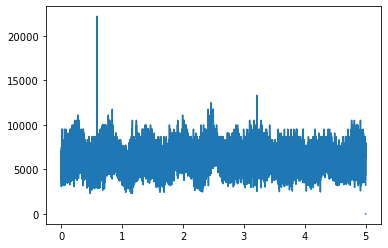

The average frequency for the plot above is given by:  6129.3037


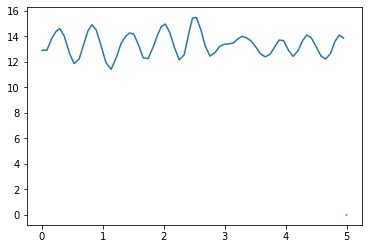

The average frequency for the plot above while rotating is : 13.352164
Below is the data for 1.5v_sagnac_1_02.mat


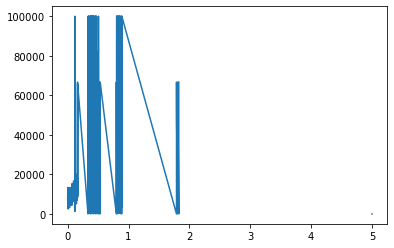

The average frequency for the plot above is given by:  39459.93


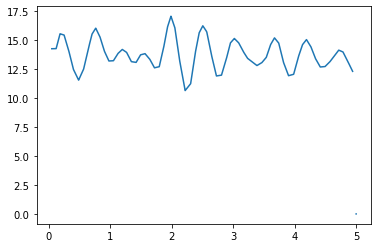

The average frequency for the plot above while rotating is : 13.728721
Below is the data for 1.5v_sagnac_1_06.mat


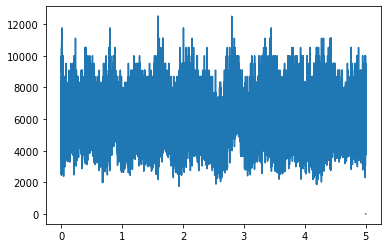

The average frequency for the plot above is given by:  5951.4224


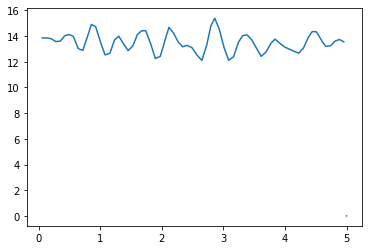

The average frequency for the plot above while rotating is : 13.48792
Below is the data for 1.5v_sagnac_1_12.mat


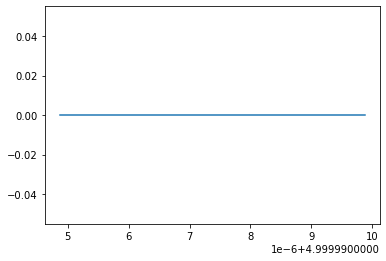

The average frequency for the plot above is given by:  0.0


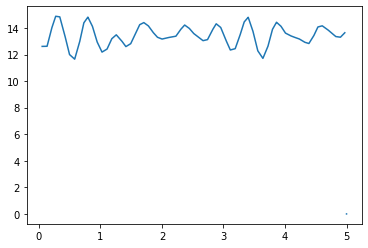

The average frequency for the plot above while rotating is : 13.419579
Below is the data for 1.5v_sagnac_1_13.mat


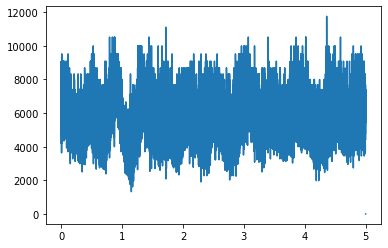

The average frequency for the plot above is given by:  5779.125


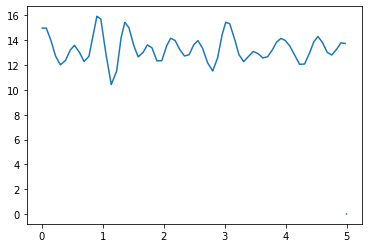

The average frequency for the plot above while rotating is : 13.298829
Below is the data for 1.5v_sagnac_1_07.mat


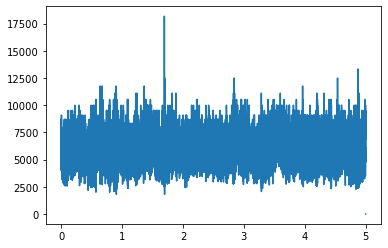

The average frequency for the plot above is given by:  5949.5747


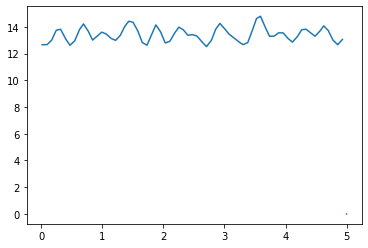

The average frequency for the plot above while rotating is : 13.417354
Below is the data for 1.5v_sagnac_1_11.mat


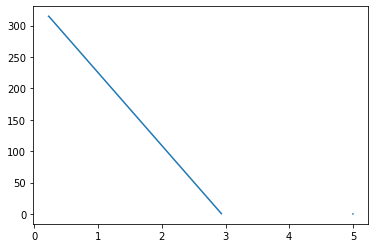

The average frequency for the plot above is given by:  157.8481


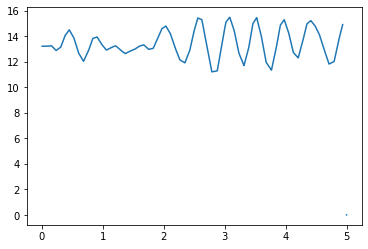

The average frequency for the plot above while rotating is : 13.386552
Below is the data for 1.5v_sagnac_1_05.mat


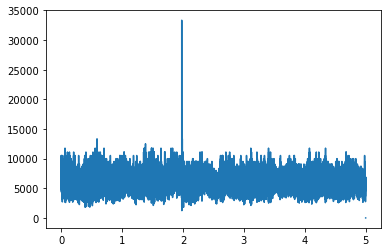

The average frequency for the plot above is given by:  6082.2896


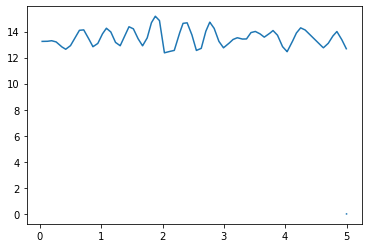

The average frequency for the plot above while rotating is : 13.520822
Below is the data for 1.5v_sagnac_1_04.mat


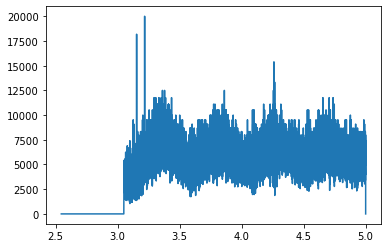

The average frequency for the plot above is given by:  4677.1084


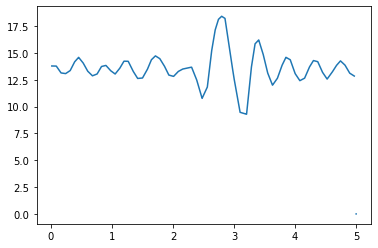

The average frequency for the plot above while rotating is : 13.560848
Below is the data for 1.5v_sagnac_1_10.mat


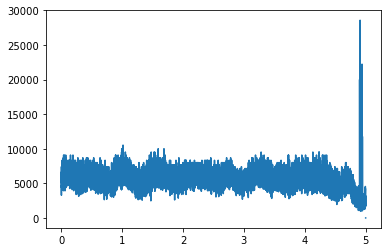

The average frequency for the plot above is given by:  5629.4565


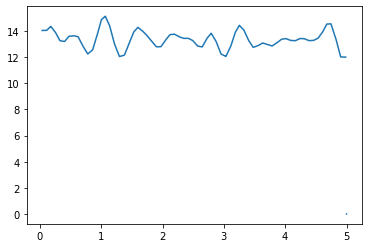

The average frequency for the plot above while rotating is : 13.357655


In [41]:
directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/1.5v_sagnac_1'
directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/1.5v_freq_1'
for filename in os.listdir(directory_sagnac):
    f = os.path.join(directory_sagnac, filename)
    print("Below is the data for" , filename)
    f2 = f.replace('sagnac', 'freq') 
#     print(f2)
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)
#     print(data)

    # Extracting informtion about time axis from data
    tstart = np.array(data['Tstart'])
    tint = np.array(data['Tinterval'])
    length = np.array(data['Length'])
    a = np.array(data['A'])
    freqa = np.array(data['freq_A_'])
#     print(freqa) # data contains nan values 
    time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    time = time.reshape(int(length), 1) #because the array is of the form (1000000, 1, 1) for some reason
#     avg = np.mean(freqa) #printing the avg does not work because of nan values
#     print("Average: " , avg)

    #plotting 
    x = time
    y = freqa
    plt.plot(x, y)
    plt.show()

    #removing nan values and determining the avg
    freqa = freqa[~np.isnan(freqa)]
#     print("", freqa)
    avg = np.mean(freqa)
    print ("The average frequency for the plot above is given by: ", avg)
    
    #Adding stuff for frequency part
    tstartf = np.array(freq['Tstart'])
    tintf = np.array(freq['Tinterval'])
    lengthf = np.array(freq['Length'])
    c = np.array(freq['C'])
    freqc = np.array(freq['freq_C_'])
#     print(freqc)

    timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    # print(time)
    timef = timef.reshape(int(lengthf), 1)
    x = timef
    y = freqc
    plt.plot(x, y)
    plt.show()

    freqc = freqc[~np.isnan(freqc)]
#     print("new", freqc)
    avg = np.mean(freqc)
    print ("The average frequency for the plot above while rotating is :", avg)

# Looping over all files for 2v

Below is the data for 2v_sagnac_1_09.mat


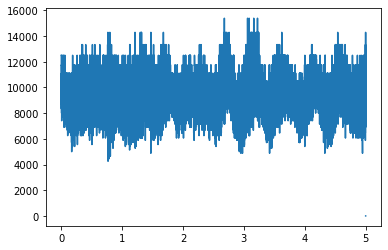

The average frequency for the plot above is given by:  9265.89


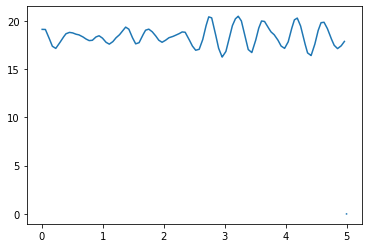

The average frequency for the plot above while rotating is : 18.366617
Below is the data for 2v_sagnac_1_21.mat


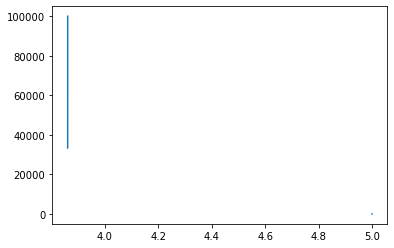

The average frequency for the plot above is given by:  45075.758


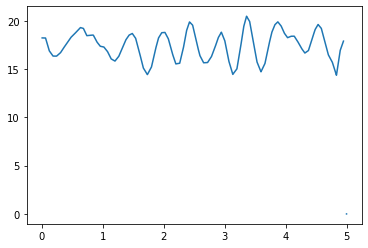

The average frequency for the plot above while rotating is : 17.406483
Below is the data for 2v_sagnac_1_20.mat


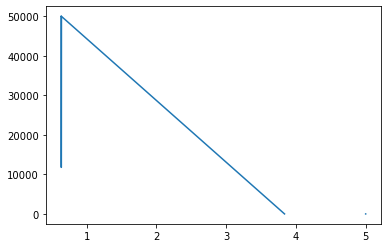

The average frequency for the plot above is given by:  25000.14


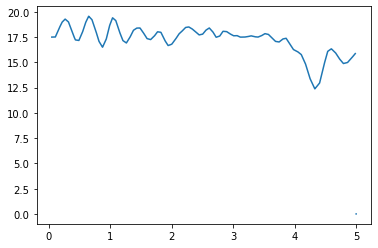

The average frequency for the plot above while rotating is : 17.22682
Below is the data for 2v_sagnac_1_08.mat


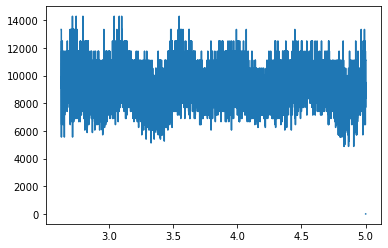

The average frequency for the plot above is given by:  9150.543


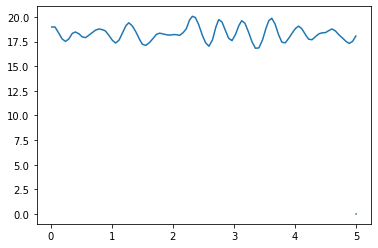

The average frequency for the plot above while rotating is : 18.287552
Below is the data for 2v_sagnac_1_22.mat


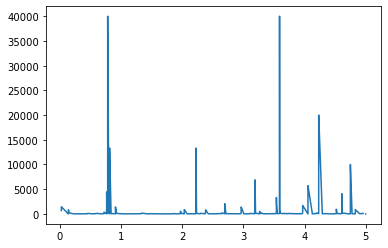

The average frequency for the plot above is given by:  431.35474


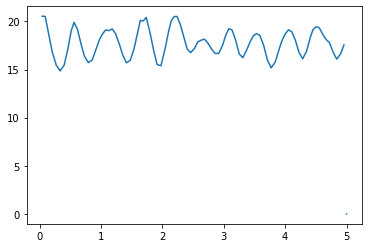

The average frequency for the plot above while rotating is : 17.71673
Below is the data for 2v_sagnac_1_23.mat


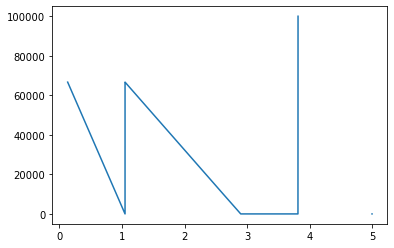

The average frequency for the plot above is given by:  25037.783


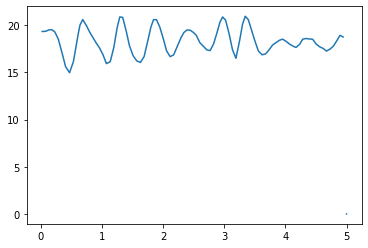

The average frequency for the plot above while rotating is : 18.293928
Below is the data for 2v_sagnac_1_27.mat


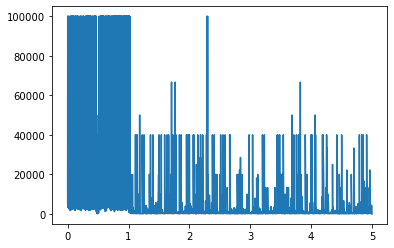

The average frequency for the plot above is given by:  4611.407


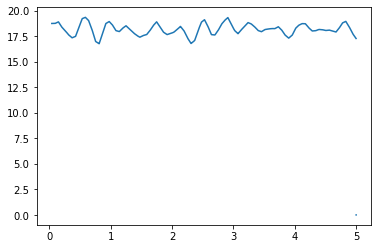

The average frequency for the plot above while rotating is : 18.15432
Below is the data for 2v_sagnac_1_26.mat


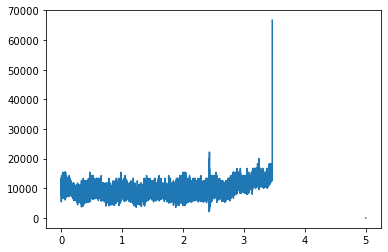

The average frequency for the plot above is given by:  9651.308


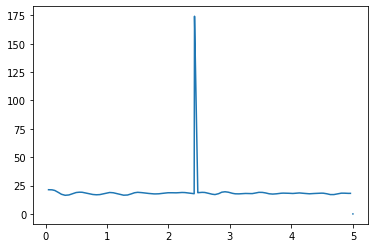

The average frequency for the plot above while rotating is : 19.109764
Below is the data for 2v_sagnac_1_24.mat


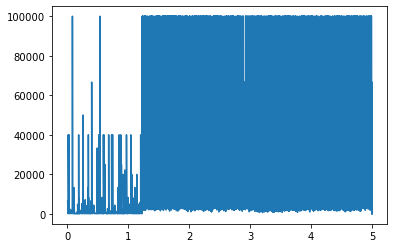

The average frequency for the plot above is given by:  10894.121


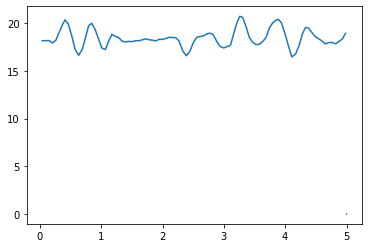

The average frequency for the plot above while rotating is : 18.405525
Below is the data for 2v_sagnac_1_18.mat


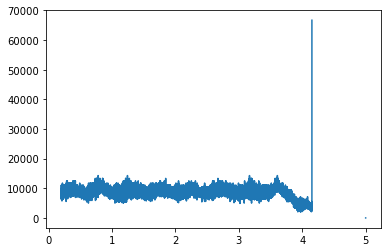

The average frequency for the plot above is given by:  8593.4


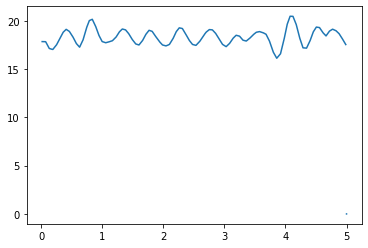

The average frequency for the plot above while rotating is : 18.31798
Below is the data for 2v_sagnac_1_19.mat


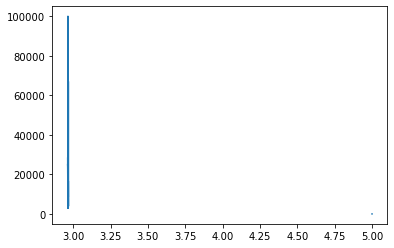

The average frequency for the plot above is given by:  17033.459


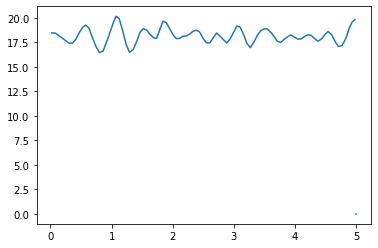

The average frequency for the plot above while rotating is : 18.155622
Below is the data for 2v_sagnac_1_25.mat


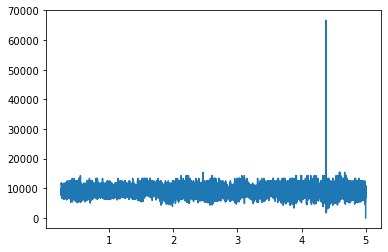

The average frequency for the plot above is given by:  8979.887


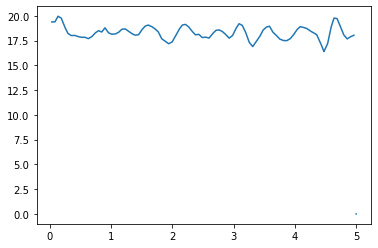

The average frequency for the plot above while rotating is : 18.27368
Below is the data for 2v_sagnac_1_28.mat


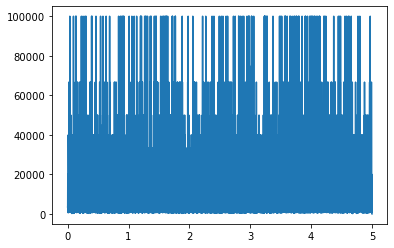

The average frequency for the plot above is given by:  6394.6553


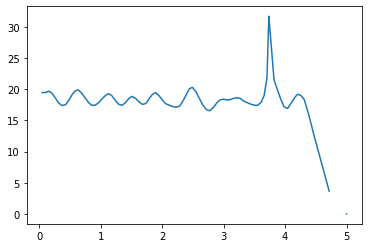

The average frequency for the plot above while rotating is : 17.916857
Below is the data for 2v_sagnac_1_14.mat


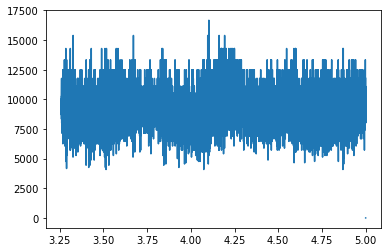

The average frequency for the plot above is given by:  9164.168


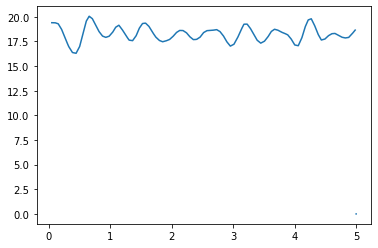

The average frequency for the plot above while rotating is : 18.243752
Below is the data for 2v_sagnac_1_01.mat


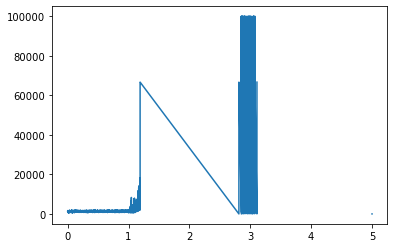

The average frequency for the plot above is given by:  21182.229


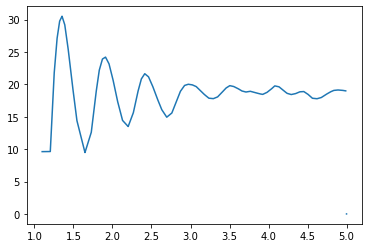

The average frequency for the plot above while rotating is : 18.50931
Below is the data for 2v_sagnac_1_15.mat


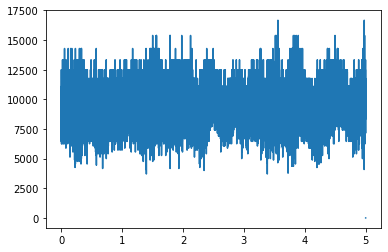

The average frequency for the plot above is given by:  9268.551


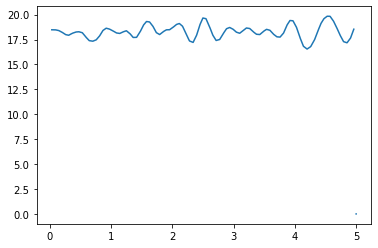

The average frequency for the plot above while rotating is : 18.276096
Below is the data for 2v_sagnac_1_03.mat


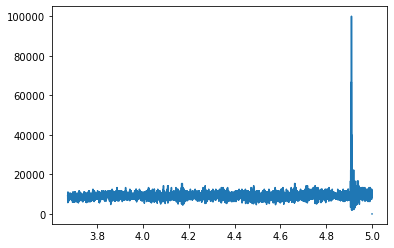

The average frequency for the plot above is given by:  9158.071


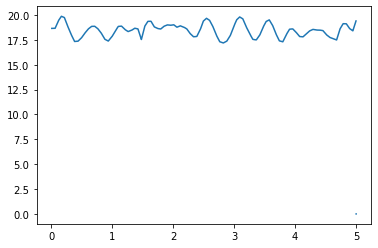

The average frequency for the plot above while rotating is : 18.452118
Below is the data for 2v_sagnac_1_17.mat


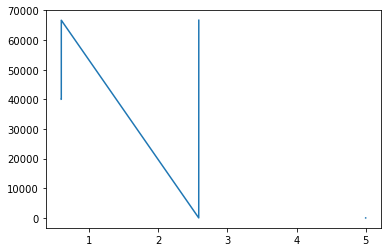

The average frequency for the plot above is given by:  33336.492


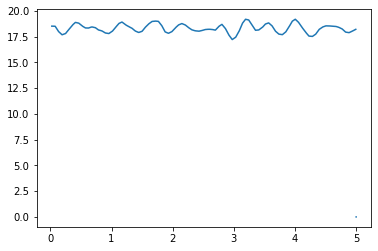

The average frequency for the plot above while rotating is : 18.311068
Below is the data for 2v_sagnac_1_16.mat


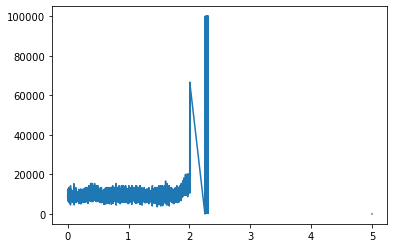

The average frequency for the plot above is given by:  12743.235


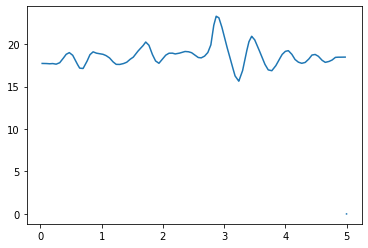

The average frequency for the plot above while rotating is : 18.584595
Below is the data for 2v_sagnac_1_02.mat


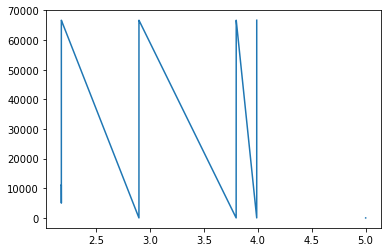

The average frequency for the plot above is given by:  33326.203


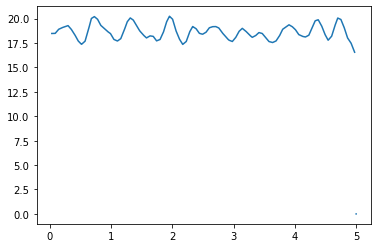

The average frequency for the plot above while rotating is : 18.628431
Below is the data for 2v_sagnac_1_06.mat


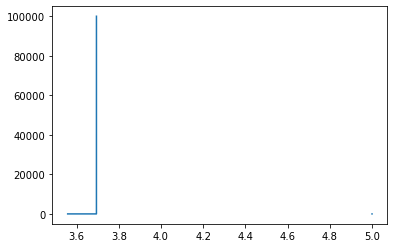

The average frequency for the plot above is given by:  39.277576


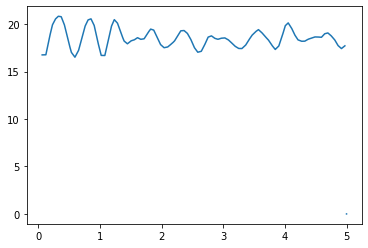

The average frequency for the plot above while rotating is : 18.520353
Below is the data for 2v_sagnac_1_12.mat


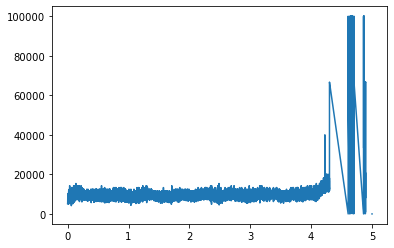

The average frequency for the plot above is given by:  12438.286


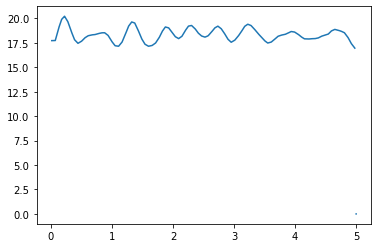

The average frequency for the plot above while rotating is : 18.334673
Below is the data for 2v_sagnac_1_13.mat


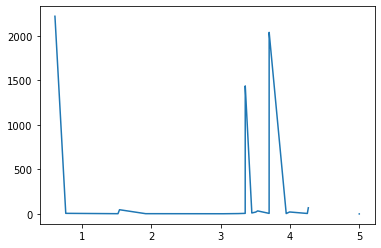

The average frequency for the plot above is given by:  142.06377


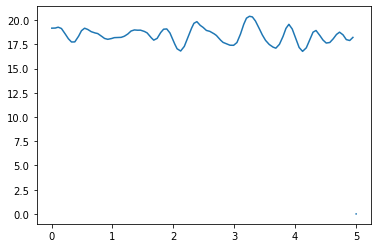

The average frequency for the plot above while rotating is : 18.419538
Below is the data for 2v_sagnac_1_07.mat


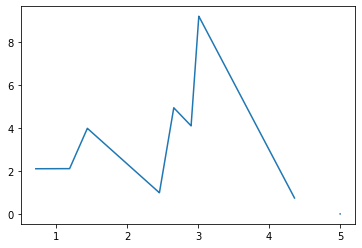

The average frequency for the plot above is given by:  3.6835845


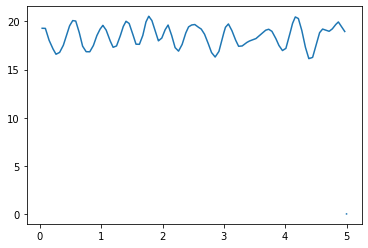

The average frequency for the plot above while rotating is : 18.444532
Below is the data for 2v_sagnac_1_11.mat


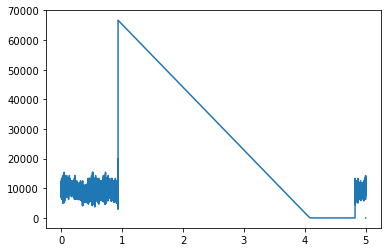

The average frequency for the plot above is given by:  23028.533


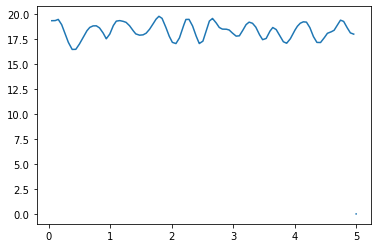

The average frequency for the plot above while rotating is : 18.349253
Below is the data for 2v_sagnac_1_05.mat


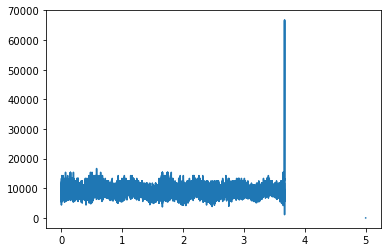

The average frequency for the plot above is given by:  9159.228


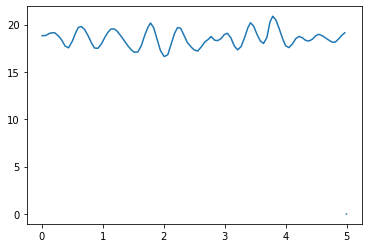

The average frequency for the plot above while rotating is : 18.527285
Below is the data for 2v_sagnac_1_04.mat


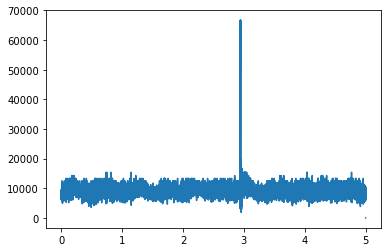

The average frequency for the plot above is given by:  9149.241


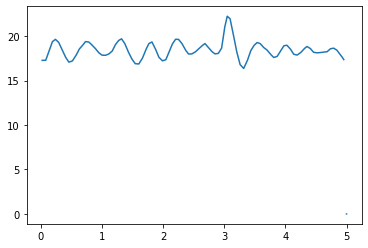

The average frequency for the plot above while rotating is : 18.44384
Below is the data for 2v_sagnac_1_10.mat


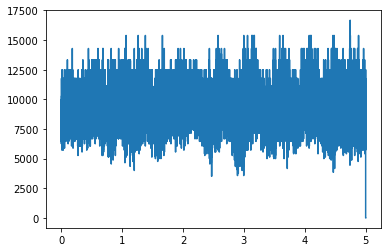

The average frequency for the plot above is given by:  9261.426


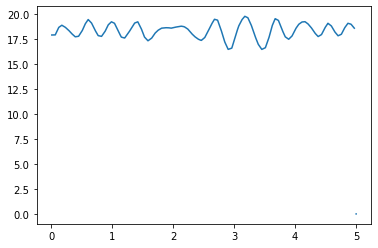

The average frequency for the plot above while rotating is : 18.33528


In [42]:
directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/2v_sagnac_1'
directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/2v_freq_1'
for filename in os.listdir(directory_sagnac):
    f = os.path.join(directory_sagnac, filename)
    print("Below is the data for" , filename)
    f2 = f.replace('sagnac', 'freq') 
#     print(f2)
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)
#     print(data)

    # Extracting informtion about time axis from data
    tstart = np.array(data['Tstart'])
    tint = np.array(data['Tinterval'])
    length = np.array(data['Length'])
    a = np.array(data['A'])
    freqa = np.array(data['freq_A_'])
#     print(freqa) # data contains nan values 
    time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    time = time.reshape(int(length), 1) #because the array is of the form (1000000, 1, 1) for some reason
#     avg = np.mean(freqa) #printing the avg does not work because of nan values
#     print("Average: " , avg)

    #plotting 
    x = time
    y = freqa
    plt.plot(x, y)
    plt.show()

    #removing nan values and determining the avg
    freqa = freqa[~np.isnan(freqa)]
#     print("", freqa)
    avg = np.mean(freqa)
    print ("The average frequency for the plot above is given by: ", avg)
    
    #Adding stuff for frequency part
    tstartf = np.array(freq['Tstart'])
    tintf = np.array(freq['Tinterval'])
    lengthf = np.array(freq['Length'])
    c = np.array(freq['C'])
    freqc = np.array(freq['freq_C_'])
#     print(freqc)

    timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    # print(time)
    timef = timef.reshape(int(lengthf), 1)
    x = timef
    y = freqc
    plt.plot(x, y)
    plt.show()

    freqc = freqc[~np.isnan(freqc)]
#     print("new", freqc)
    avg = np.mean(freqc)
    print ("The average frequency for the plot above while rotating is :", avg)

# Looping over all files for 2.5v

Below is the data for 2.5v_sagnac_1_25.mat


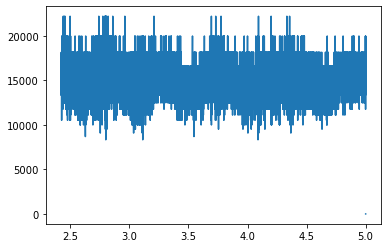

The average frequency for the plot above is given by:  14800.893


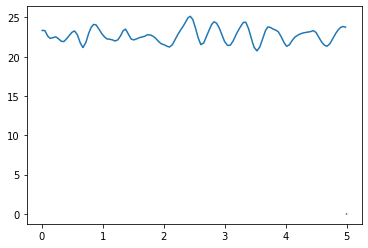

The average frequency for the plot above while rotating is : 22.702154
Below is the data for 2.5v_sagnac_1_19.mat


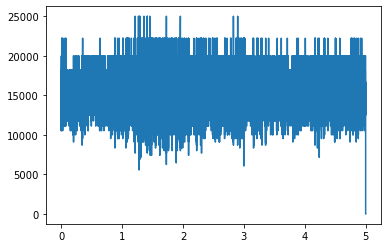

The average frequency for the plot above is given by:  15199.081


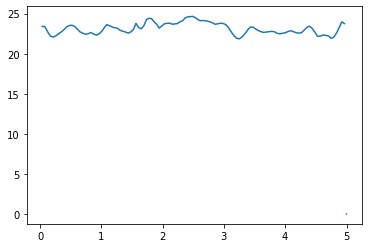

The average frequency for the plot above while rotating is : 23.118996
Below is the data for 2.5v_sagnac_1_18.mat


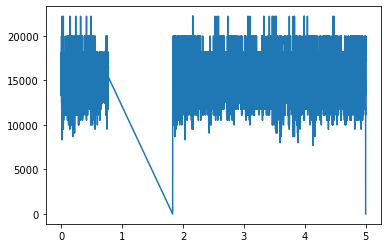

The average frequency for the plot above is given by:  13536.229


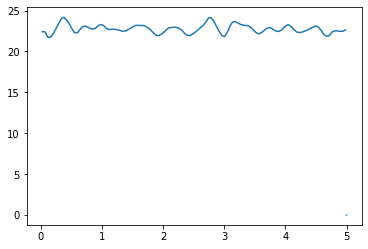

The average frequency for the plot above while rotating is : 22.76072
Below is the data for 2.5v_sagnac_1_24.mat


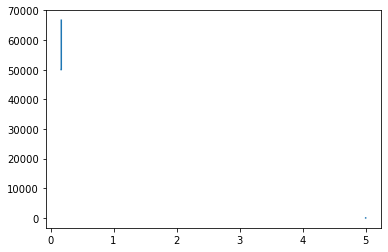

The average frequency for the plot above is given by:  43333.336


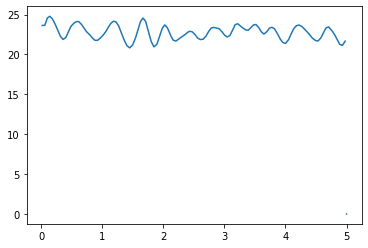

The average frequency for the plot above while rotating is : 22.780035
Below is the data for 2.5v_sagnac_1_26.mat


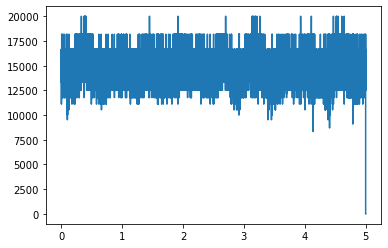

The average frequency for the plot above is given by:  14593.214


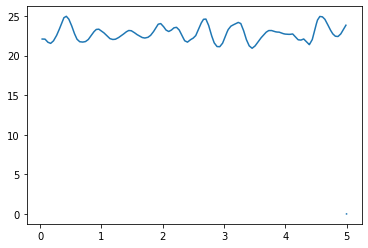

The average frequency for the plot above while rotating is : 22.789595
Below is the data for 2.5v_sagnac_1_27.mat


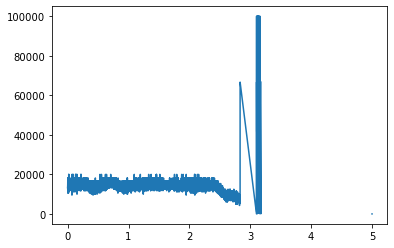

The average frequency for the plot above is given by:  16055.629


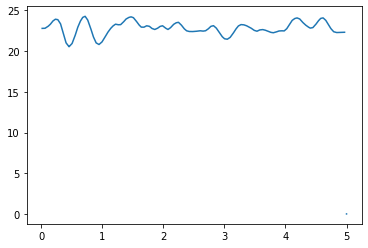

The average frequency for the plot above while rotating is : 22.819424
Below is the data for 2.5v_sagnac_1_23.mat


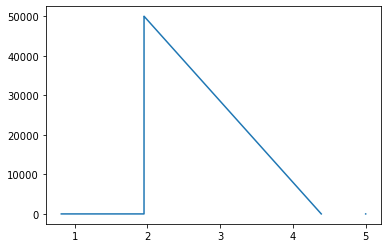

The average frequency for the plot above is given by:  17044.75


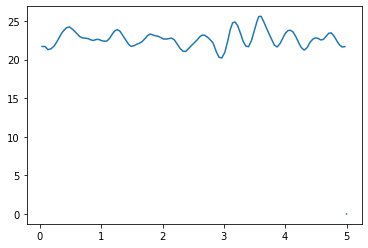

The average frequency for the plot above while rotating is : 22.684843
Below is the data for 2.5v_sagnac_1_22.mat


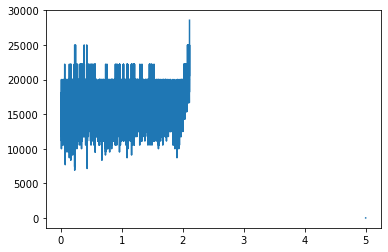

The average frequency for the plot above is given by:  15639.98


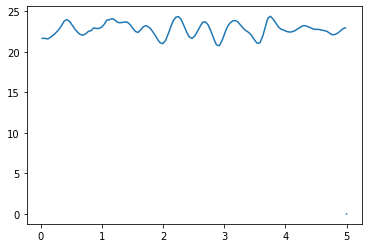

The average frequency for the plot above while rotating is : 22.785307
Below is the data for 2.5v_sagnac_1_08.mat


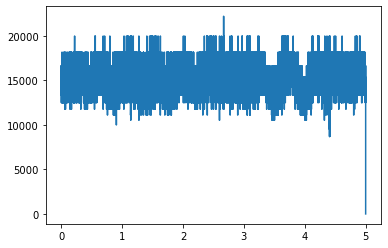

The average frequency for the plot above is given by:  15090.482


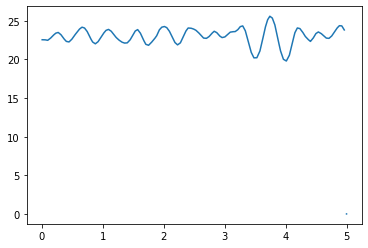

The average frequency for the plot above while rotating is : 23.012472
Below is the data for 2.5v_sagnac_1_20.mat


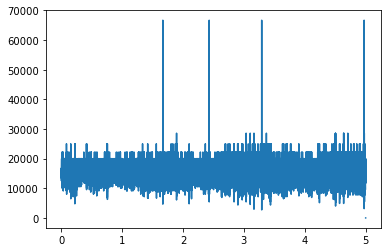

The average frequency for the plot above is given by:  15138.137


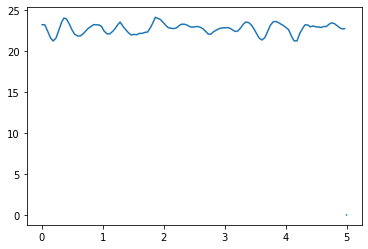

The average frequency for the plot above while rotating is : 22.783749
Below is the data for 2.5v_sagnac_1_21.mat


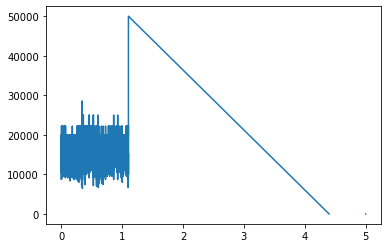

The average frequency for the plot above is given by:  22549.605


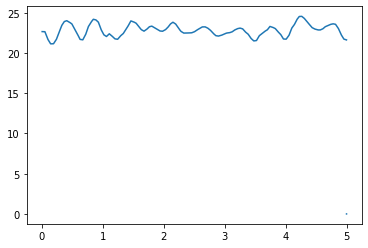

The average frequency for the plot above while rotating is : 22.82706
Below is the data for 2.5v_sagnac_1_09.mat


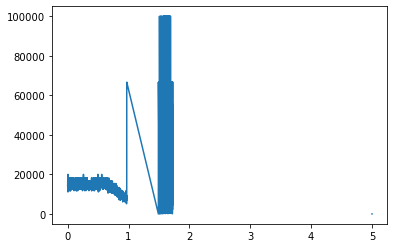

The average frequency for the plot above is given by:  22242.645


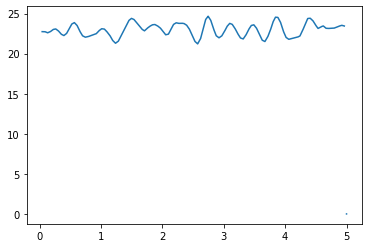

The average frequency for the plot above while rotating is : 22.961306
Below is the data for 2.5v_sagnac_1_10.mat


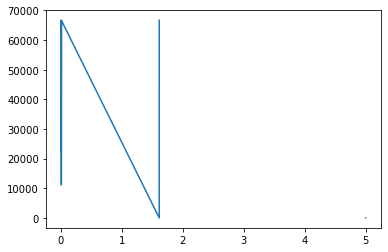

The average frequency for the plot above is given by:  33337.594


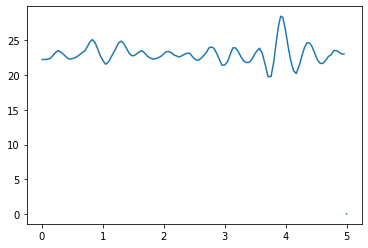

The average frequency for the plot above while rotating is : 23.016956
Below is the data for 2.5v_sagnac_1_04.mat


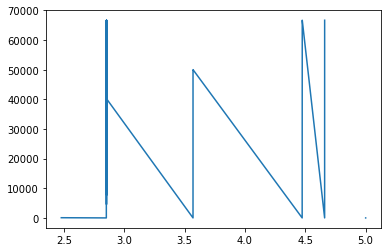

The average frequency for the plot above is given by:  19809.373


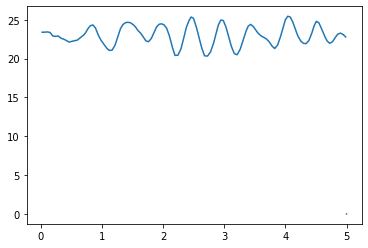

The average frequency for the plot above while rotating is : 22.970703
Below is the data for 2.5v_sagnac_1_05.mat


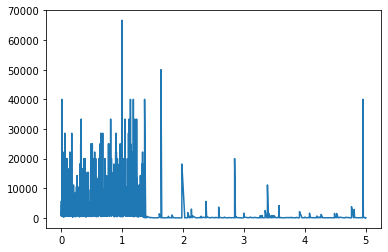

The average frequency for the plot above is given by:  1131.0785


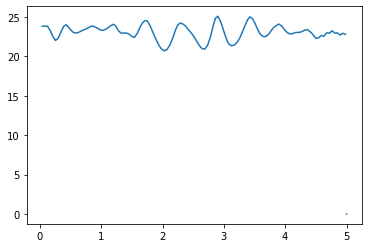

The average frequency for the plot above while rotating is : 23.061483
Below is the data for 2.5v_sagnac_1_11.mat


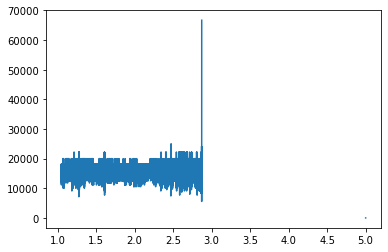

The average frequency for the plot above is given by:  15229.907


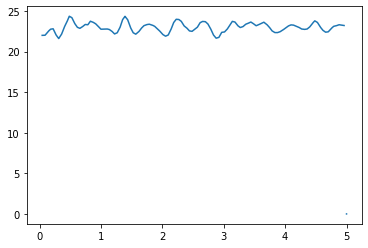

The average frequency for the plot above while rotating is : 22.97173
Below is the data for 2.5v_sagnac_1_07.mat


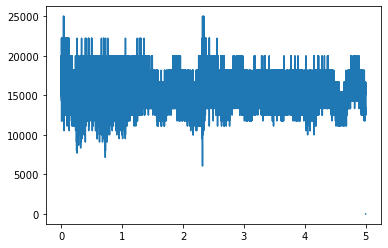

The average frequency for the plot above is given by:  15316.323


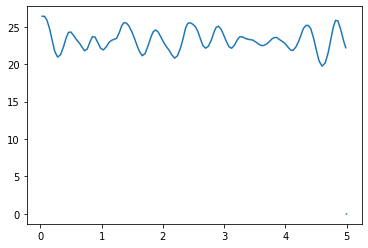

The average frequency for the plot above while rotating is : 23.21723
Below is the data for 2.5v_sagnac_1_13.mat


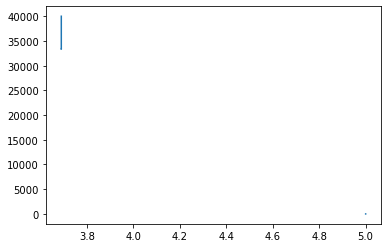

The average frequency for the plot above is given by:  30000.0


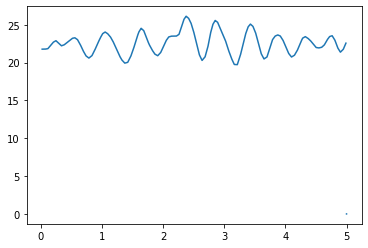

The average frequency for the plot above while rotating is : 22.53138
Below is the data for 2.5v_sagnac_1_12.mat


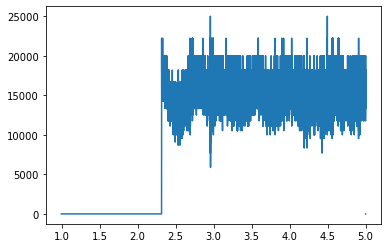

The average frequency for the plot above is given by:  10203.745


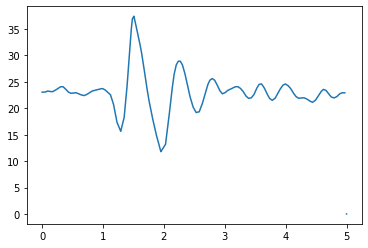

The average frequency for the plot above while rotating is : 22.964666
Below is the data for 2.5v_sagnac_1_06.mat


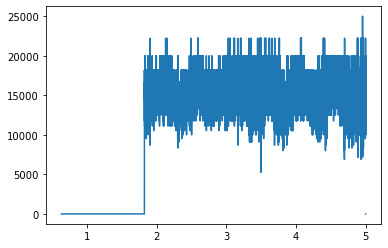

The average frequency for the plot above is given by:  10957.967


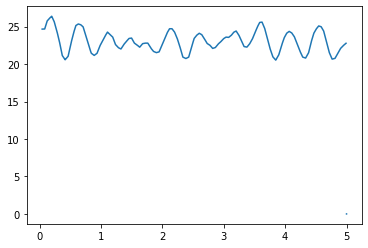

The average frequency for the plot above while rotating is : 23.036953
Below is the data for 2.5v_sagnac_1_02.mat


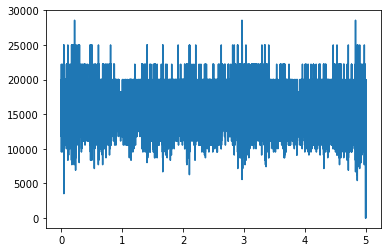

The average frequency for the plot above is given by:  15417.985


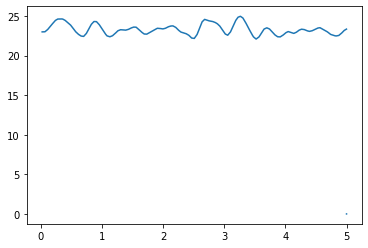

The average frequency for the plot above while rotating is : 23.297365
Below is the data for 2.5v_sagnac_1_16.mat


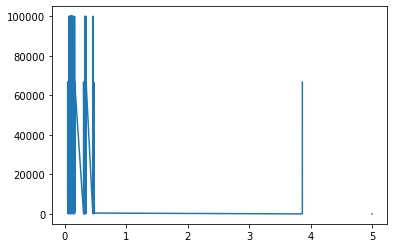

The average frequency for the plot above is given by:  4014.6487


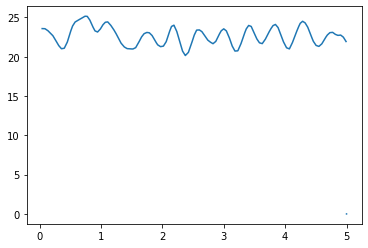

The average frequency for the plot above while rotating is : 22.638708
Below is the data for 2.5v_sagnac_1_17.mat


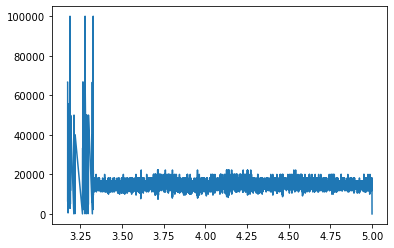

The average frequency for the plot above is given by:  15469.683


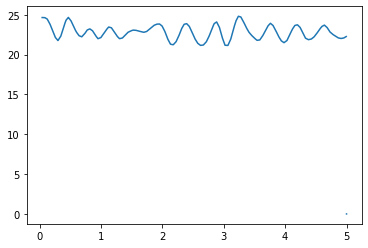

The average frequency for the plot above while rotating is : 22.812458
Below is the data for 2.5v_sagnac_1_03.mat


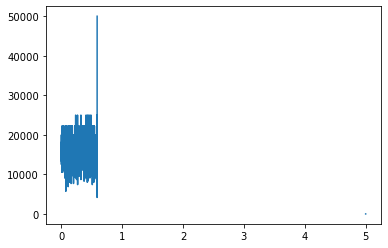

The average frequency for the plot above is given by:  15501.427


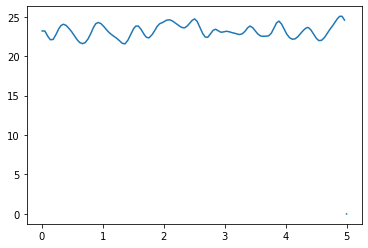

The average frequency for the plot above while rotating is : 23.174349
Below is the data for 2.5v_sagnac_1_15.mat


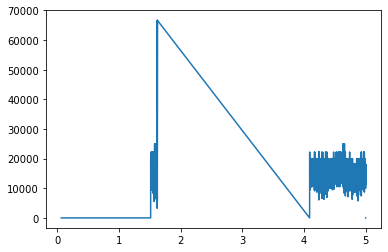

The average frequency for the plot above is given by:  19677.252


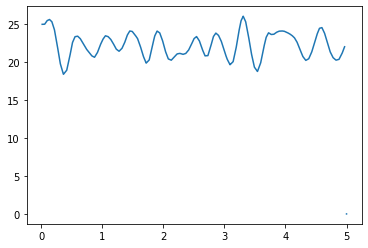

The average frequency for the plot above while rotating is : 22.233772
Below is the data for 2.5v_sagnac_1_01.mat


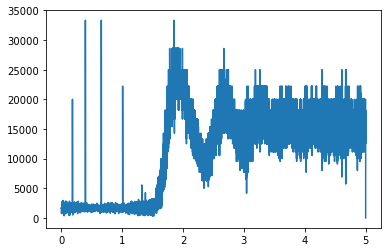

The average frequency for the plot above is given by:  11059.646


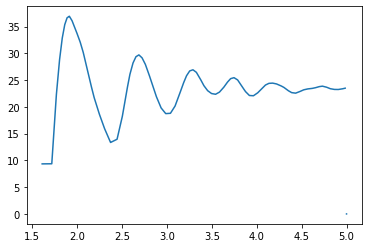

The average frequency for the plot above while rotating is : 23.356985
Below is the data for 2.5v_sagnac_1_14.mat


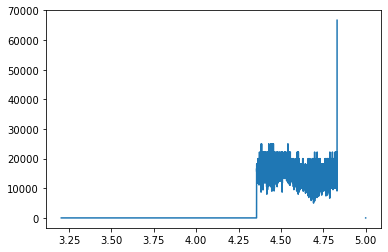

The average frequency for the plot above is given by:  4366.2197


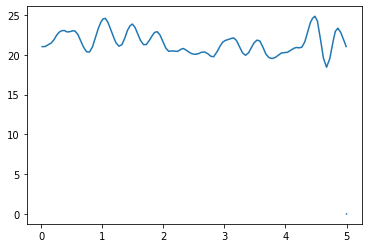

The average frequency for the plot above while rotating is : 21.502388
Below is the data for 2.5v_sagnac_1_28.mat


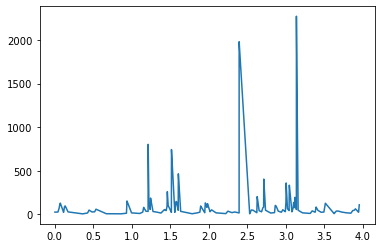

The average frequency for the plot above is given by:  86.45443


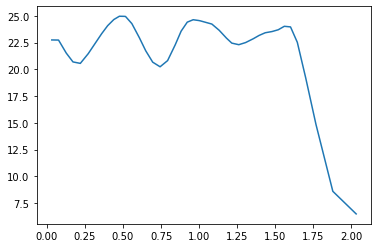

The average frequency for the plot above while rotating is : 20.87287


In [43]:
directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/2.5v_sagnac_1'
directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/2.5v_freq_1'
for filename in os.listdir(directory_sagnac):
    f = os.path.join(directory_sagnac, filename)
    print("Below is the data for" , filename)
    f2 = f.replace('sagnac', 'freq') 
#     print(f2)
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)
#     print(data)

    # Extracting informtion about time axis from data
    tstart = np.array(data['Tstart'])
    tint = np.array(data['Tinterval'])
    length = np.array(data['Length'])
    a = np.array(data['A'])
    freqa = np.array(data['freq_A_'])
#     print(freqa) # data contains nan values 
    time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    time = time.reshape(int(length), 1) #because the array is of the form (1000000, 1, 1) for some reason
#     avg = np.mean(freqa) #printing the avg does not work because of nan values
#     print("Average: " , avg)

    #plotting 
    x = time
    y = freqa
    plt.plot(x, y)
    plt.show()

    #removing nan values and determining the avg
    freqa = freqa[~np.isnan(freqa)]
#     print("", freqa)
    avg = np.mean(freqa)
    print ("The average frequency for the plot above is given by: ", avg)
    
    #Adding stuff for frequency part
    tstartf = np.array(freq['Tstart'])
    tintf = np.array(freq['Tinterval'])
    lengthf = np.array(freq['Length'])
    c = np.array(freq['C'])
    freqc = np.array(freq['freq_C_'])
#     print(freqc)

    timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    # print(time)
    timef = timef.reshape(int(lengthf), 1)
    x = timef
    y = freqc
    plt.plot(x, y)
    plt.show()

    freqc = freqc[~np.isnan(freqc)]
#     print("new", freqc)
    avg = np.mean(freqc)
    print ("The average frequency for the plot above while rotating is :", avg)

# Looping over all files for 3v

**Need to load the 3v_sagnac_2 file for this one**

Below is the data for 3v_sagnac_1_08.mat


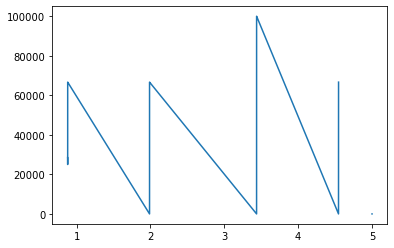

The average frequency for the plot above is given by:  38372.68


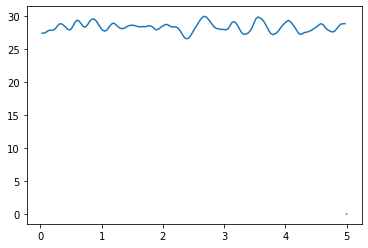

The average frequency for the plot above while rotating is : 28.301079
Below is the data for 3v_sagnac_1_20.mat


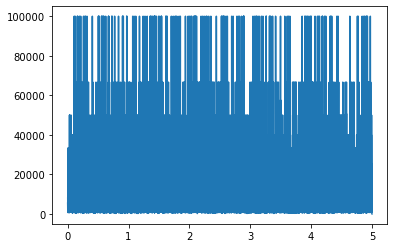

The average frequency for the plot above is given by:  6375.571


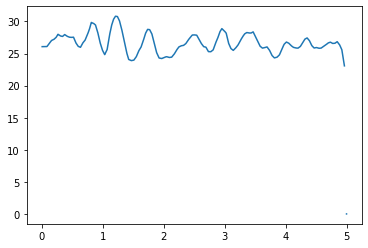

The average frequency for the plot above while rotating is : 26.63001
Below is the data for 3v_sagnac_1_21.mat


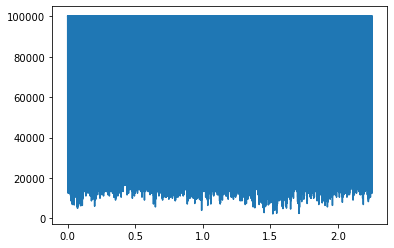

The average frequency for the plot above is given by:  50766.637


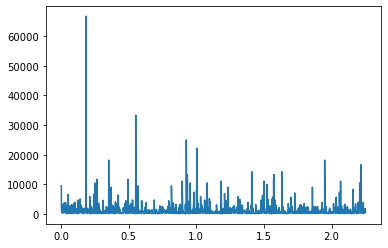

The average frequency for the plot above while rotating is : 1009.49854
Below is the data for 3v_sagnac_1_09.mat


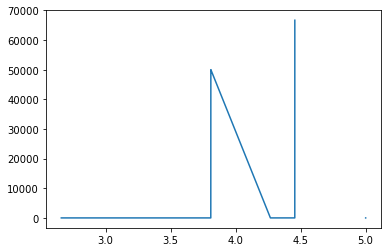

The average frequency for the plot above is given by:  6374.04


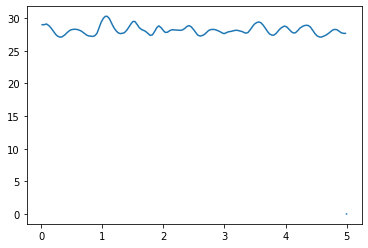

The average frequency for the plot above while rotating is : 28.179148
Below is the data for 3v_sagnac_1_19.mat


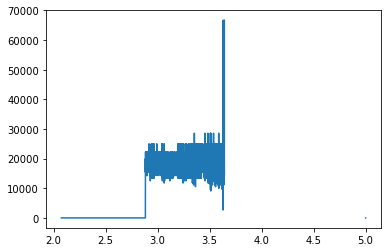

The average frequency for the plot above is given by:  8855.496


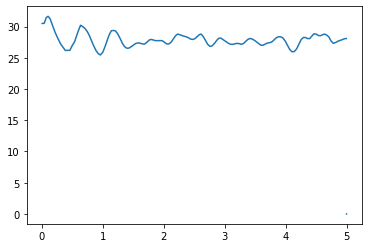

The average frequency for the plot above while rotating is : 27.859102
Below is the data for 3v_sagnac_1_18.mat


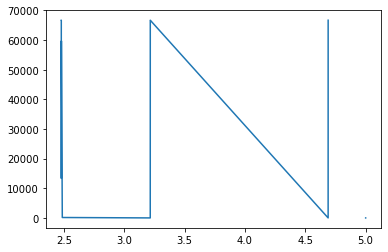

The average frequency for the plot above is given by:  22361.064


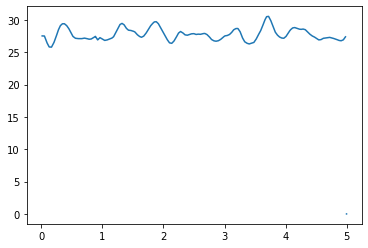

The average frequency for the plot above while rotating is : 27.7621
Below is the data for 3v_sagnac_1_15.mat


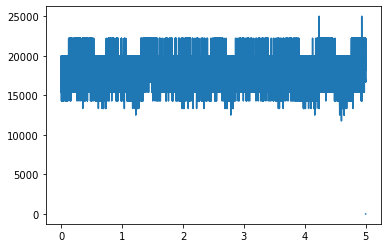

The average frequency for the plot above is given by:  17775.525


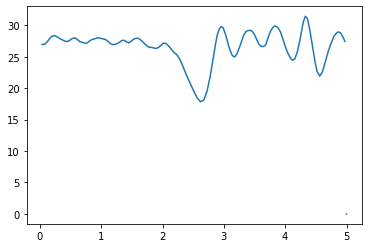

The average frequency for the plot above while rotating is : 26.542475
Below is the data for 3v_sagnac_1_01.mat


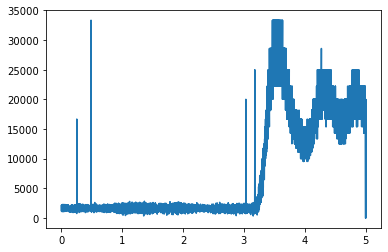

The average frequency for the plot above is given by:  7357.377


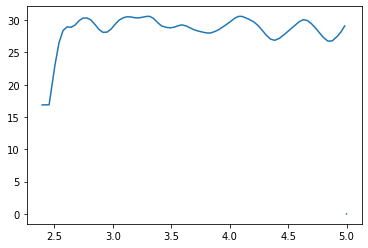

The average frequency for the plot above while rotating is : 28.487333
Below is the data for 3v_sagnac_1_14.mat


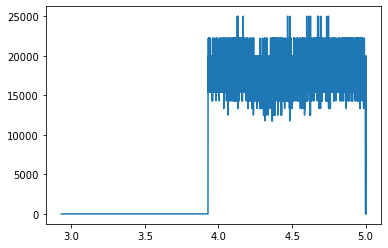

The average frequency for the plot above is given by:  9261.597


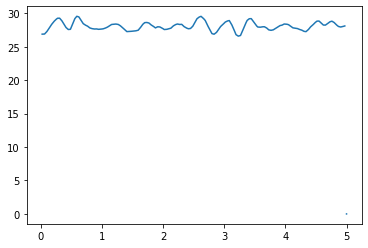

The average frequency for the plot above while rotating is : 28.06781
Below is the data for 3v_sagnac_1_02.mat


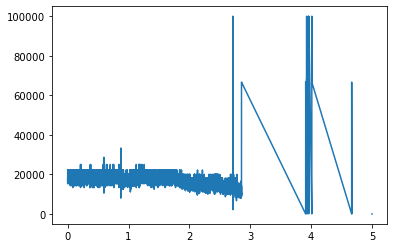

The average frequency for the plot above is given by:  23463.535


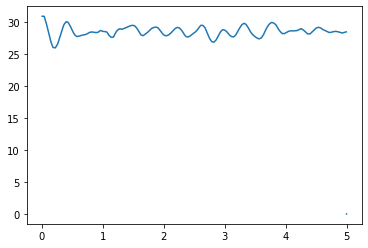

The average frequency for the plot above while rotating is : 28.474535
Below is the data for 3v_sagnac_1_16.mat


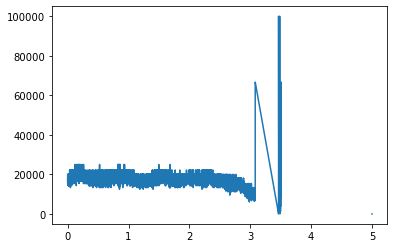

The average frequency for the plot above is given by:  18898.473


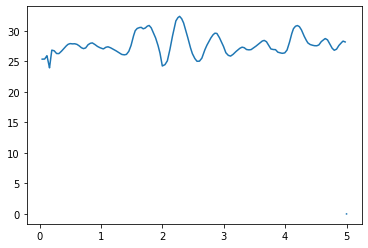

The average frequency for the plot above while rotating is : 27.734009
Below is the data for 3v_sagnac_1_17.mat


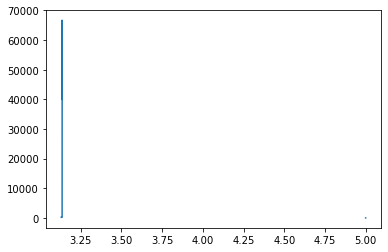

The average frequency for the plot above is given by:  3778.9045


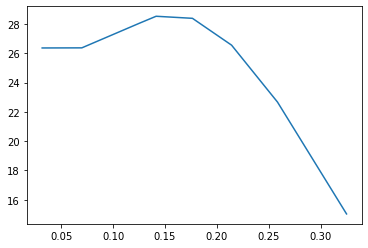

The average frequency for the plot above while rotating is : 25.058146
Below is the data for 3v_sagnac_1_03.mat


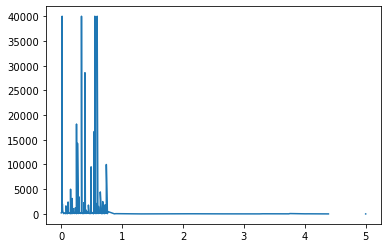

The average frequency for the plot above is given by:  215.97733


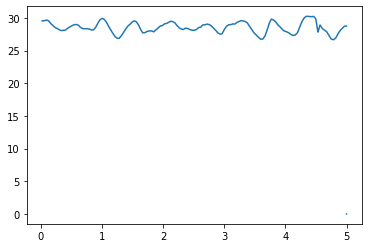

The average frequency for the plot above while rotating is : 28.519093
Below is the data for 3v_sagnac_1_07.mat


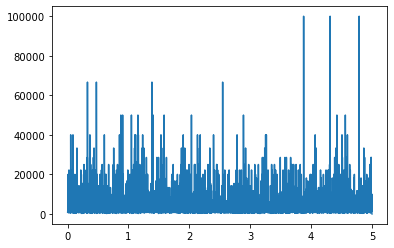

The average frequency for the plot above is given by:  2709.0366


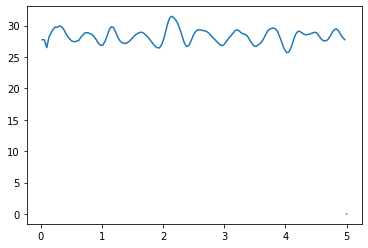

The average frequency for the plot above while rotating is : 28.294458
Below is the data for 3v_sagnac_1_13.mat


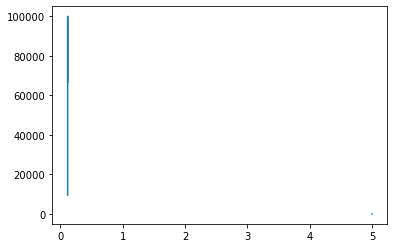

The average frequency for the plot above is given by:  34560.844


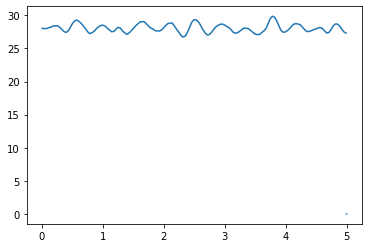

The average frequency for the plot above while rotating is : 28.069244
Below is the data for 3v_sagnac_1_12.mat


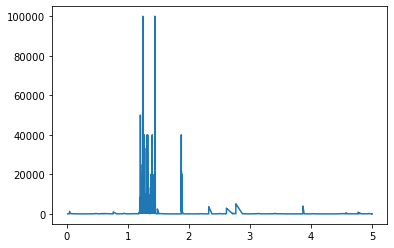

The average frequency for the plot above is given by:  361.3737


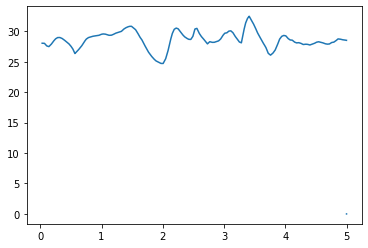

The average frequency for the plot above while rotating is : 28.584414
Below is the data for 3v_sagnac_1_06.mat


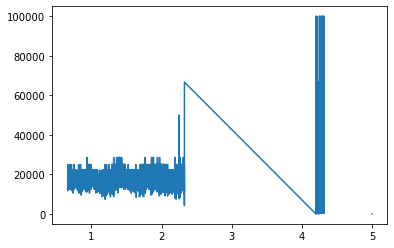

The average frequency for the plot above is given by:  25963.467


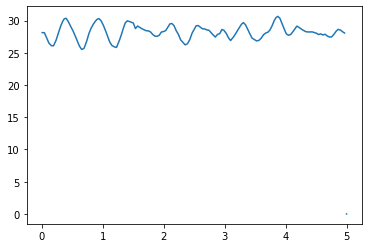

The average frequency for the plot above while rotating is : 28.198551
Below is the data for 3v_sagnac_1_10.mat


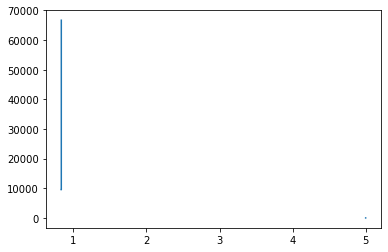

The average frequency for the plot above is given by:  34497.355


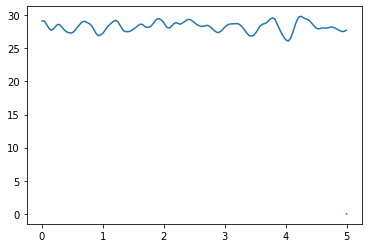

The average frequency for the plot above while rotating is : 28.258358
Below is the data for 3v_sagnac_1_04.mat


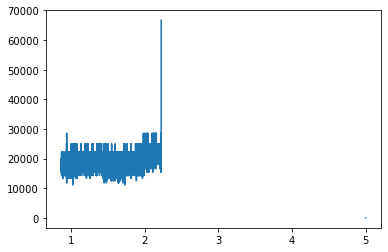

The average frequency for the plot above is given by:  18882.49


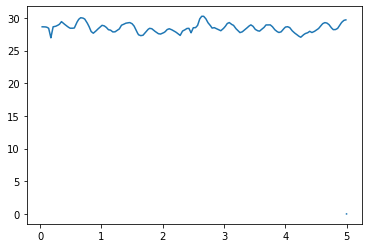

The average frequency for the plot above while rotating is : 28.446362
Below is the data for 3v_sagnac_1_05.mat


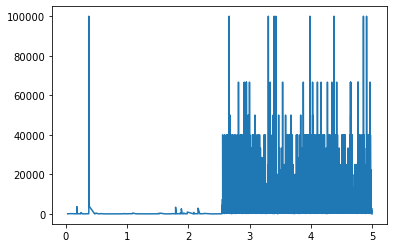

The average frequency for the plot above is given by:  1945.8497


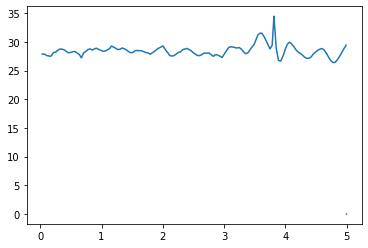

The average frequency for the plot above while rotating is : 28.415215
Below is the data for 3v_sagnac_1_11.mat


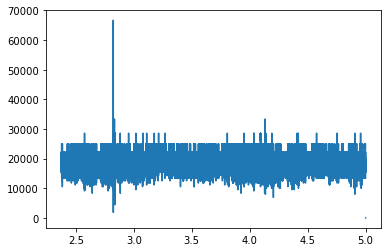

The average frequency for the plot above is given by:  18120.139


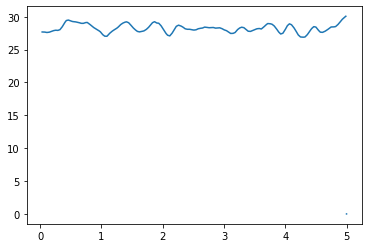

The average frequency for the plot above while rotating is : 28.237707


In [44]:
directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/3v_sagnac_1'
directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/3v_freq_1'
for filename in os.listdir(directory_sagnac):
    f = os.path.join(directory_sagnac, filename)
    print("Below is the data for" , filename)
    f2 = f.replace('sagnac', 'freq') 
#     print(f2)
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)
#     print(data)

    # Extracting informtion about time axis from data
    tstart = np.array(data['Tstart'])
    tint = np.array(data['Tinterval'])
    length = np.array(data['Length'])
    a = np.array(data['A'])
    freqa = np.array(data['freq_A_'])
#     print(freqa) # data contains nan values 
    time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    time = time.reshape(int(length), 1) #because the array is of the form (1000000, 1, 1) for some reason
#     avg = np.mean(freqa) #printing the avg does not work because of nan values
#     print("Average: " , avg)

    #plotting 
    x = time
    y = freqa
    plt.plot(x, y)
    plt.show()

    #removing nan values and determining the avg
    freqa = freqa[~np.isnan(freqa)]
#     print("", freqa)
    avg = np.mean(freqa)
    print ("The average frequency for the plot above is given by: ", avg)
    
    #Adding stuff for frequency part
    tstartf = np.array(freq['Tstart'])
    tintf = np.array(freq['Tinterval'])
    lengthf = np.array(freq['Length'])
    c = np.array(freq['C'])
    freqc = np.array(freq['freq_C_'])
#     print(freqc)

    timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    # print(time)
    timef = timef.reshape(int(lengthf), 1)
    x = timef
    y = freqc
    plt.plot(x, y)
    plt.show()

    freqc = freqc[~np.isnan(freqc)]
#     print("new", freqc)
    avg = np.mean(freqc)
    print ("The average frequency for the plot above while rotating is :", avg)

# Looping over all files for 5v

Below is the data for 5v_sagnac_1_07.mat


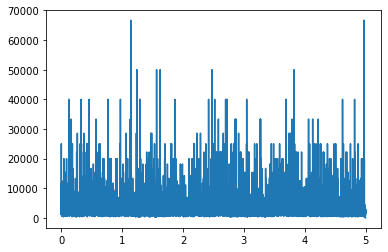

The average frequency for the plot above is given by:  2600.8418


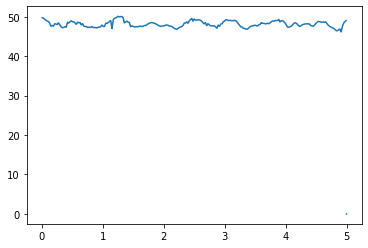

The average frequency for the plot above while rotating is : 48.136368
Below is the data for 5v_sagnac_1_13.mat


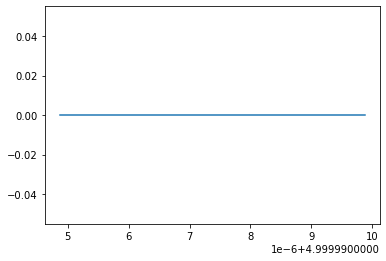

The average frequency for the plot above is given by:  0.0


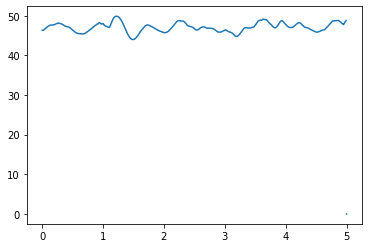

The average frequency for the plot above while rotating is : 47.0804
Below is the data for 5v_sagnac_1_12.mat


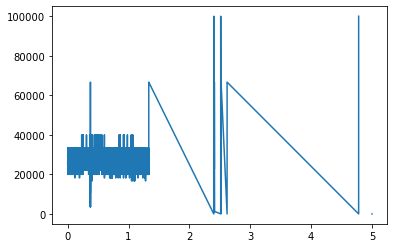

The average frequency for the plot above is given by:  30711.848


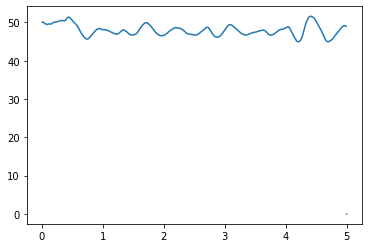

The average frequency for the plot above while rotating is : 47.94402
Below is the data for 5v_sagnac_1_06.mat


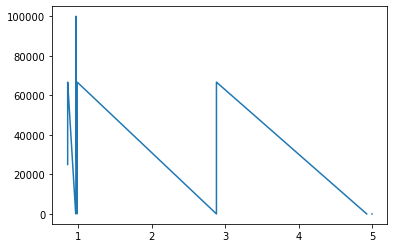

The average frequency for the plot above is given by:  33319.33


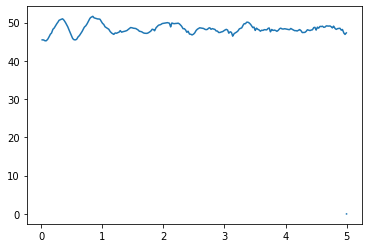

The average frequency for the plot above while rotating is : 48.350273
Below is the data for 5v_sagnac_1_10.mat


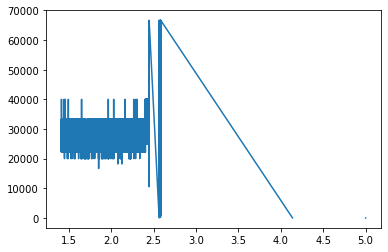

The average frequency for the plot above is given by:  30940.625


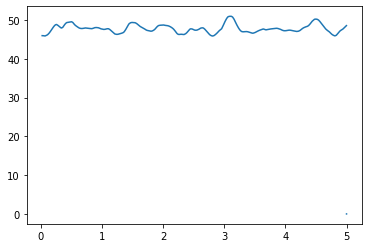

The average frequency for the plot above while rotating is : 47.784935
Below is the data for 5v_sagnac_1_04.mat


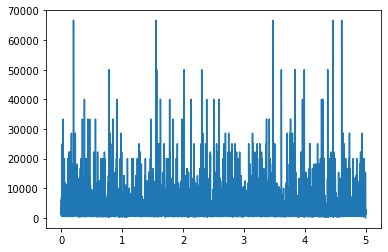

The average frequency for the plot above is given by:  2550.4714


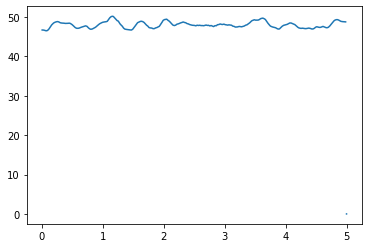

The average frequency for the plot above while rotating is : 47.998657
Below is the data for 5v_sagnac_1_05.mat


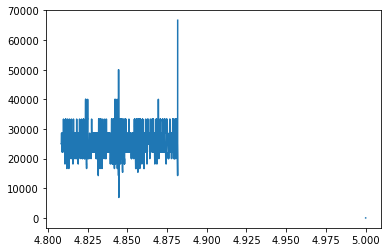

The average frequency for the plot above is given by:  25491.723


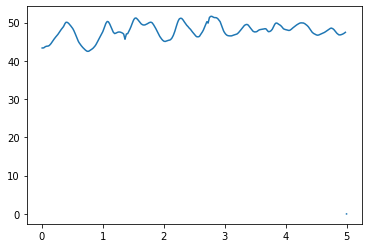

The average frequency for the plot above while rotating is : 47.79857
Below is the data for 5v_sagnac_1_11.mat


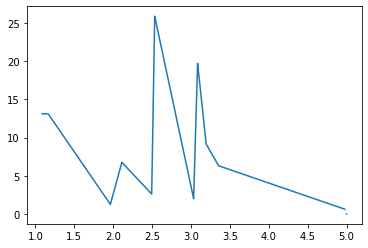

The average frequency for the plot above is given by:  6.596766


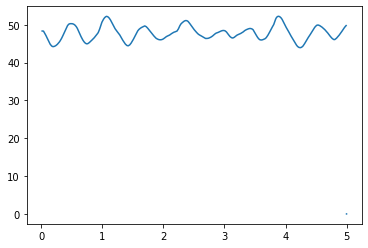

The average frequency for the plot above while rotating is : 47.77547
Below is the data for 5v_sagnac_1_15.mat


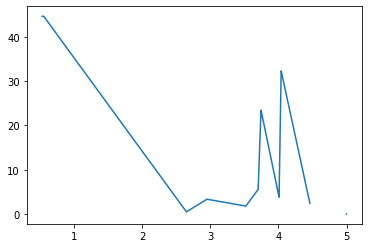

The average frequency for the plot above is given by:  16.048664


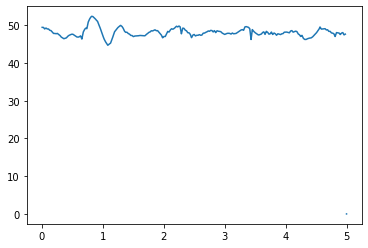

The average frequency for the plot above while rotating is : 48.06369
Below is the data for 5v_sagnac_1_01.mat


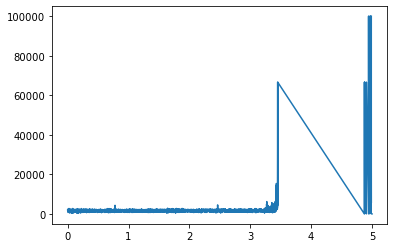

The average frequency for the plot above is given by:  11435.067


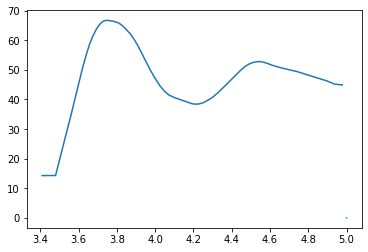

The average frequency for the plot above while rotating is : 46.883602
Below is the data for 5v_sagnac_1_14.mat


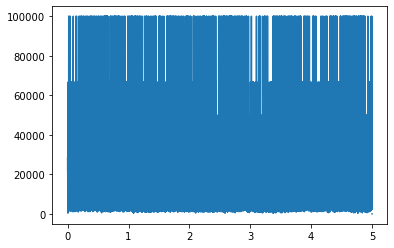

The average frequency for the plot above is given by:  10739.593


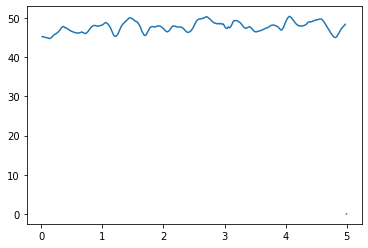

The average frequency for the plot above while rotating is : 47.696106
Below is the data for 5v_sagnac_1_02.mat


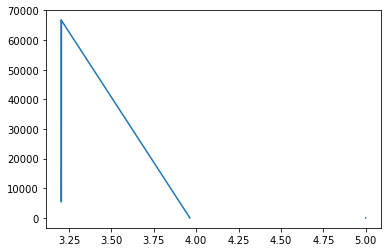

The average frequency for the plot above is given by:  33336.27


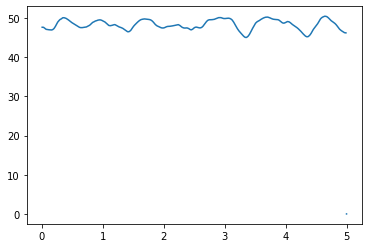

The average frequency for the plot above while rotating is : 48.351234
Below is the data for 5v_sagnac_1_16.mat


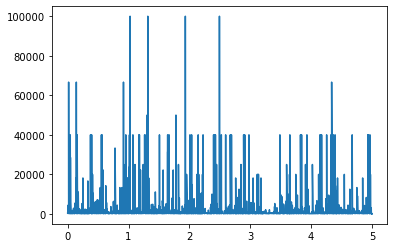

The average frequency for the plot above is given by:  1718.4877


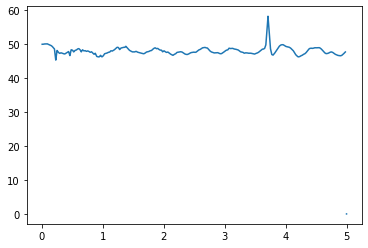

The average frequency for the plot above while rotating is : 48.041836
Below is the data for 5v_sagnac_1_17.mat


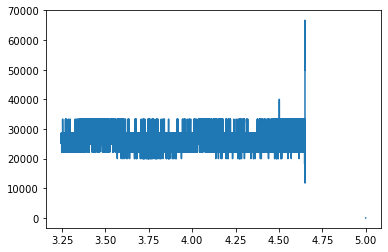

The average frequency for the plot above is given by:  26218.16


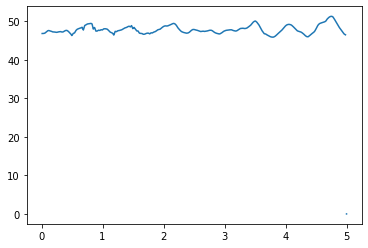

The average frequency for the plot above while rotating is : 47.862236
Below is the data for 5v_sagnac_1_03.mat


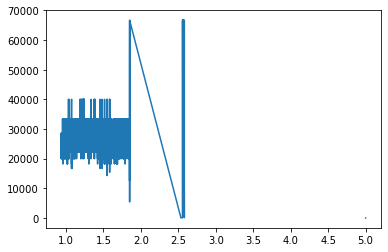

The average frequency for the plot above is given by:  29107.088


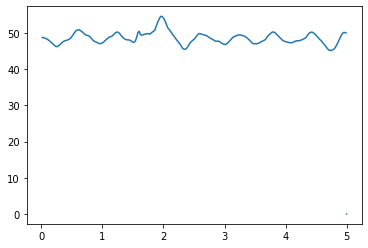

The average frequency for the plot above while rotating is : 48.60202
Below is the data for 5v_sagnac_1_19.mat


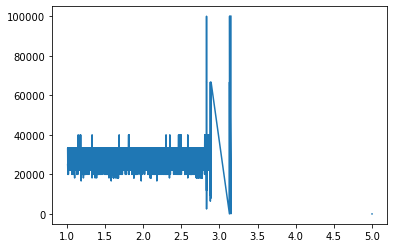

The average frequency for the plot above is given by:  27460.516


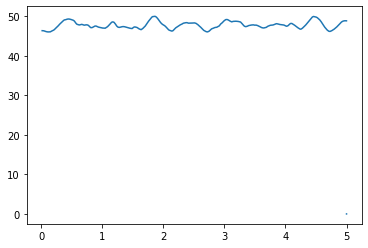

The average frequency for the plot above while rotating is : 47.759277
Below is the data for 5v_sagnac_1_18.mat


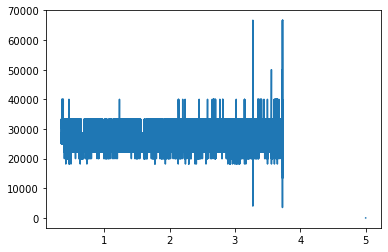

The average frequency for the plot above is given by:  26660.934


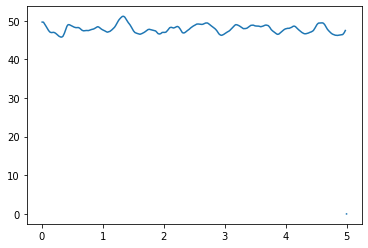

The average frequency for the plot above while rotating is : 47.85953
Below is the data for 5v_sagnac_1_20.mat


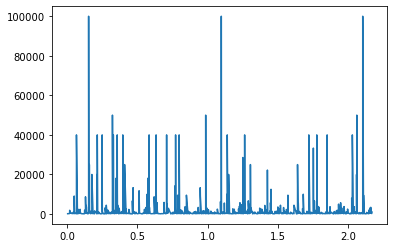

The average frequency for the plot above is given by:  1642.7069


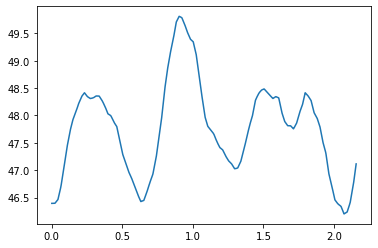

The average frequency for the plot above while rotating is : 47.764294
Below is the data for 5v_sagnac_1_08.mat


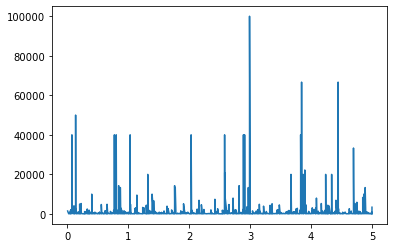

The average frequency for the plot above is given by:  883.98987


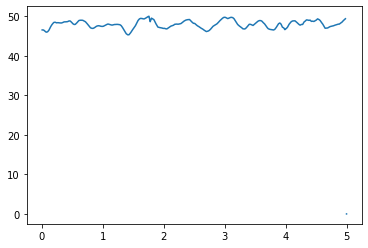

The average frequency for the plot above while rotating is : 47.999287
Below is the data for 5v_sagnac_1_09.mat


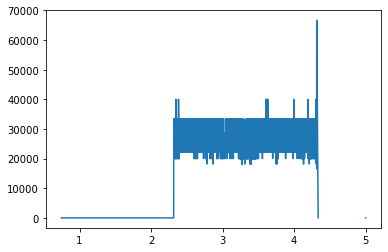

The average frequency for the plot above is given by:  15064.575


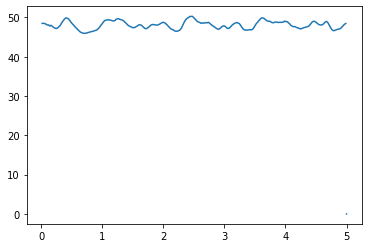

The average frequency for the plot above while rotating is : 48.085846


In [45]:
directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/5v_sagnac_1'
directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/5v_freq_1'
for filename in os.listdir(directory_sagnac):
    f = os.path.join(directory_sagnac, filename)
    print("Below is the data for" , filename)
    f2 = f.replace('sagnac', 'freq') 
#     print(f2)
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)
#     print(data)

    # Extracting informtion about time axis from data
    tstart = np.array(data['Tstart'])
    tint = np.array(data['Tinterval'])
    length = np.array(data['Length'])
    a = np.array(data['A'])
    freqa = np.array(data['freq_A_'])
#     print(freqa) # data contains nan values 
    time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    time = time.reshape(int(length), 1) #because the array is of the form (1000000, 1, 1) for some reason
#     avg = np.mean(freqa) #printing the avg does not work because of nan values
#     print("Average: " , avg)

    #plotting 
    x = time
    y = freqa
    plt.plot(x, y)
    plt.show()

    #removing nan values and determining the avg
    freqa = freqa[~np.isnan(freqa)]
#     print("", freqa)
    avg = np.mean(freqa)
    print ("The average frequency for the plot above is given by: ", avg)
    
    #Adding stuff for frequency part
    tstartf = np.array(freq['Tstart'])
    tintf = np.array(freq['Tinterval'])
    lengthf = np.array(freq['Length'])
    c = np.array(freq['C'])
    freqc = np.array(freq['freq_C_'])
#     print(freqc)

    timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    # print(time)
    timef = timef.reshape(int(lengthf), 1)
    x = timef
    y = freqc
    plt.plot(x, y)
    plt.show()

    freqc = freqc[~np.isnan(freqc)]
#     print("new", freqc)
    avg = np.mean(freqc)
    print ("The average frequency for the plot above while rotating is :", avg)

# Looping over all files for 7v

In [ ]:
directory_sagnac = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/7v_sagnac_1'
directory_freq = '/Users/tesla/uni/lab_course/laser_gyroscope/laser_gyroscope_data/scale_factor/7v_freq_1'
for filename in os.listdir(directory_sagnac):
    f = os.path.join(directory_sagnac, filename)
    print("Below is the data for" , filename)
    f2 = f.replace('sagnac', 'freq') 
#     print(f2)
    data = scipy.io.loadmat(f)
    freq = scipy.io.loadmat(f2)
#     print(data)

    # Extracting informtion about time axis from data
    tstart = np.array(data['Tstart'])
    tint = np.array(data['Tinterval'])
    length = np.array(data['Length'])
    a = np.array(data['A'])
    freqa = np.array(data['freq_A_'])
#     print(freqa) # data contains nan values 
    time = np.linspace(tstart, (tstart + tint) * int(length), int(length))
    time = time.reshape(int(length), 1) #because the array is of the form (1000000, 1, 1) for some reason
#     avg = np.mean(freqa) #printing the avg does not work because of nan values
#     print("Average: " , avg)

    #plotting 
    x = time
    y = freqa
    plt.plot(x, y)
    plt.show()

    #removing nan values and determining the avg
    freqa = freqa[~np.isnan(freqa)]
#     print("", freqa)
    avg = np.mean(freqa)
    print ("The average frequency for the plot above is given by: ", avg)
    
    #Adding stuff for frequency part
    tstartf = np.array(freq['Tstart'])
    tintf = np.array(freq['Tinterval'])
    lengthf = np.array(freq['Length'])
    c = np.array(freq['C'])
    freqc = np.array(freq['freq_C_'])
#     print(freqc)

    timef = np.linspace(tstartf, (tstartf + tintf) * int(lengthf), int(lengthf))
    # print(time)
    timef = timef.reshape(int(lengthf), 1)
    x = timef
    y = freqc
    plt.plot(x, y)
    plt.show()

    freqc = freqc[~np.isnan(freqc)]
#     print("new", freqc)
    avg = np.mean(freqc)
    print ("The average frequency for the plot above while rotating is :", avg)